In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec

sns.set_style('ticks')

## Define functions

In [2]:
def assign_index_material (df):
    df = df.reset_index()
    df = df.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
    df = df.set_index(['segment','chemistry','material'])
    #df = df.divide(1e9)
    return(df)

In [3]:
def assign_index_capacity (df):
    df = df.reset_index()
    df = df.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
    df = df.set_index(['segment','chemistry'])
    #df = df.divide(1e6)
    return(df)

In [4]:
def stock_additions_segmented (share_segments, raw_vehicle_stock):
    
# This function takes the stock in each year and calculates the stock additions for the period 2016-2060
# Year 2015 is the total initial stock in that year
#Furthermore, it divides the df in segments
    
    #Clean up the df
    
    raw_vehicle_stock = raw_vehicle_stock.iloc[:,7:]
    raw_vehicle_stock = raw_vehicle_stock.reset_index()
    raw_vehicle_stock = raw_vehicle_stock.drop(['index'], axis = 1)
    raw_vehicle_stock.index = ['share']
    
    #Calculate capacity addition per year
   # stock_addition = raw_vehicle_stock.diff(axis = 1)
    #stock_addition[2015] = raw_vehicle_stock[2015]
    
    stock_segmented = share_segments.dot(raw_vehicle_stock)
    return(stock_segmented)

In [5]:
def calculate_eol(index, years_list, start_year, prob_data, stock_add_df):
   
    
    ## Trying to calculate eol for all the years
    prob_data = prob_data.transpose()
    prob_data = pd.concat([prob_data]*len(stock_add_df.groupby(level=0)))
    
    prob_data = prob_data.reset_index()
    prob_data.drop('index', inplace = True, axis = 1)
    prob_data = prob_data.reindex(index, level = 0)
    prob_data.columns = pd.Index(np.arange(start_year, start_year+25))
   
    testing_testing = pd.concat([stock_add_df[start_year]]*25, axis = 1)
    
    testing_testing.columns =  pd.Index(np.arange(start_year, start_year+25))
    
    eol = testing_testing.mul(prob_data)
    return(eol)

In [6]:

def get_share(stock, BEVs, PHEVs, ICEVG, ICEVD):
    BEV_share = BEVs.div(stock)
    PHEV_share = PHEVs.div(stock)
    ICEV_tot = ICEVG + ICEVD
    ICEV_share = ICEV_tot.div(stock)
    frames = [BEV_share,PHEV_share,ICEV_share]
    out = pd.concat(frames)
    out.index = ['BEV','PHEV','ICEV']
    return(out)

## Start code

In [7]:
all = pd.read_excel('ODYM_RECC.xls','Model_Results')

## Data from shares of each segment extracted by the ICCT pocketbook 2019/2020. 
## For now I assume a constant share. This will likely be analysed differently

In [8]:
segment = ['A','B','C','D','E','F','J']
share = ['0.08','0.2056','0.2658','0.0679','0.0287', '0.0021','0.3499']
share = np.array(share,dtype=float)
share_df = pd.DataFrame(share,columns=['share'])

## BEVs

In [9]:
BEV_stock = all[all['Indicator'].str.contains('final consumption (use phase inflow), Battery Electric Vehicles (BEV)', regex = False)]

################################################# LED ###############################
BEV_stock_base_LED =  BEV_stock[BEV_stock['SocEc scen'].str.contains('LED', regex = False)]
BEV_stock_base_LED =  BEV_stock_base_LED[BEV_stock_base_LED['ClimPol scen'].str.contains('Baseline', regex = False)]

BEV_stock_RCP26_LED =  BEV_stock[BEV_stock['SocEc scen'].str.contains('LED', regex = False)]
BEV_stock_RCP26_LED =  BEV_stock_RCP26_LED[BEV_stock_RCP26_LED['ClimPol scen'].str.contains('RCP2.6', regex = False)]


#########################################################################################


#Baseline - SSP1
BEV_stock_base_SSP1 = BEV_stock[BEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
BEV_stock_base_SSP1 = BEV_stock_base_SSP1[BEV_stock_base_SSP1['ClimPol scen'].str.contains('Baseline', regex = False)]

#RCP2.6 - SSP1
BEV_stock_RCP26_SSP1 = BEV_stock[BEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
BEV_stock_RCP26_SSP1 = BEV_stock_RCP26_SSP1[BEV_stock_RCP26_SSP1['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#RCP2.6 - SSP2
BEV_stock_RCP26_SSP2 = BEV_stock[BEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
BEV_stock_RCP26_SSP2 = BEV_stock_RCP26_SSP2[BEV_stock_RCP26_SSP2['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#Baseline - SSP2
BEV_stock = BEV_stock[BEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
BEV_stock = BEV_stock[BEV_stock['ClimPol scen'].str.contains('Baseline', regex = False)]



## PHEVs

In [10]:
PHEV_stock = all[all['Indicator'].str.contains('final consumption (use phase inflow), Plugin Hybrid Electric Vehicles (PHEV)', regex = False)]

################################################# LED ###############################
PHEV_stock_base_LED =  PHEV_stock[PHEV_stock['SocEc scen'].str.contains('LED', regex = False)]
PHEV_stock_base_LED =  PHEV_stock_base_LED[PHEV_stock_base_LED['ClimPol scen'].str.contains('Baseline', regex = False)]

PHEV_stock_RCP26_LED =  PHEV_stock[PHEV_stock['SocEc scen'].str.contains('LED', regex = False)]
PHEV_stock_RCP26_LED =  PHEV_stock_RCP26_LED[PHEV_stock_RCP26_LED['ClimPol scen'].str.contains('RCP2.6', regex = False)]


#########################################################################################
#RCP2.6 - SSP1
PHEV_stock_base_SSP1 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
PHEV_stock_base_SSP1 = PHEV_stock_base_SSP1[PHEV_stock_base_SSP1['ClimPol scen'].str.contains('Baseline', regex = False)]

#RCP2.6 - SSP1
PHEV_stock_RCP26_SSP1 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP1', regex = False)]
PHEV_stock_RCP26_SSP1 = PHEV_stock_RCP26_SSP1[PHEV_stock_RCP26_SSP1['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#RCP2.6 - SSP2
PHEV_stock_RCP26_SSP2 = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
PHEV_stock_RCP26_SSP2 = PHEV_stock_RCP26_SSP2[PHEV_stock_RCP26_SSP2['ClimPol scen'].str.contains('RCP2.6', regex = False)]

#Baseline - SSP2
PHEV_stock = PHEV_stock[PHEV_stock['SocEc scen'].str.contains('SSP2', regex = False)]
PHEV_stock = PHEV_stock[PHEV_stock['ClimPol scen'].str.contains('Baseline', regex = False)]





In [11]:
PHEV_stock


,Indicator,Unit,Region,System_location,RE scen,SocEc scen,ClimPol scen,2015,2016,2017,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
2212,"final consumption (use phase inflow), Plugin H...","Vehicles: million/yr, Buildings: million m2/yr",Global,F_6_7,Cf. Cover sheet,SSP2,Baseline(unmitigated),0.0,0.761415,1.027918,...,29.388905,31.282552,33.166733,35.047789,36.939135,38.83885,40.698401,42.513012,44.288501,46.025326


## Read pickle files

In [12]:

PHEV_stock_baseLED = pd.read_pickle('stock_PHEV_base_LED.pkl')
PHEV_stock_RCP26LED = pd.read_pickle('stock_PHEV_RCP26_LED.pkl')

## Starting with BEVs

In [13]:
BEV_stockadd_RCP26_SSP1 = stock_additions_segmented(share_df, BEV_stock_RCP26_SSP1)
BEV_stockadd_RCP26_SSP2 = stock_additions_segmented(share_df, BEV_stock_RCP26_SSP2) 

BEV_stockadd_base_SSP1 = stock_additions_segmented(share_df, BEV_stock_base_SSP1) 
BEV_stockadd_base_SSP2 = stock_additions_segmented(share_df, BEV_stock) 


## Now PHEVs

In [14]:
PHEV_stockadd_RCP26_SSP1 = stock_additions_segmented(share_df, PHEV_stock_RCP26_SSP1)
PHEV_stockadd_RCP26_SSP2 = stock_additions_segmented(share_df, PHEV_stock_RCP26_SSP2) 

PHEV_stockadd_base_SSP1 = stock_additions_segmented(share_df, PHEV_stock_base_SSP1) 
PHEV_stockadd_base_SSP2 = stock_additions_segmented(share_df, PHEV_stock) 


## Reading data with market share of chemistries

In [15]:
from scipy.interpolate import make_interp_spline, BSpline

In [16]:
chemistries = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet1', skiprows=24, nrows = 8, usecols = 'B:AV')

In [17]:
chem_new = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet1', skiprows=37, nrows = 3, usecols = 'B:AV')

In [18]:
chemistries = chemistries.set_index(['chemistry'])

In [19]:
chem_new = chem_new.set_index(['chemistry'])

In [20]:
chem_new = chem_new.interpolate(method = 'linear', axis = 1)

In [21]:
chemistries = chemistries.interpolate(method = 'linear',  axis = 1)

In [22]:
col1 = np.array([169/256, 169/ 256, 169/256, 1])
my_map = LinearSegmentedColormap.from_list('paired',colors=[ col1,'xkcd:dull blue','xkcd:asparagus',
                                                           'xkcd:light orange',
                                                            'xkcd:reddish','xkcd:light eggplant','xkcd:sandy','xkcd:burgundy'], N=8)


In [23]:
boh = chemistries.sort_index()

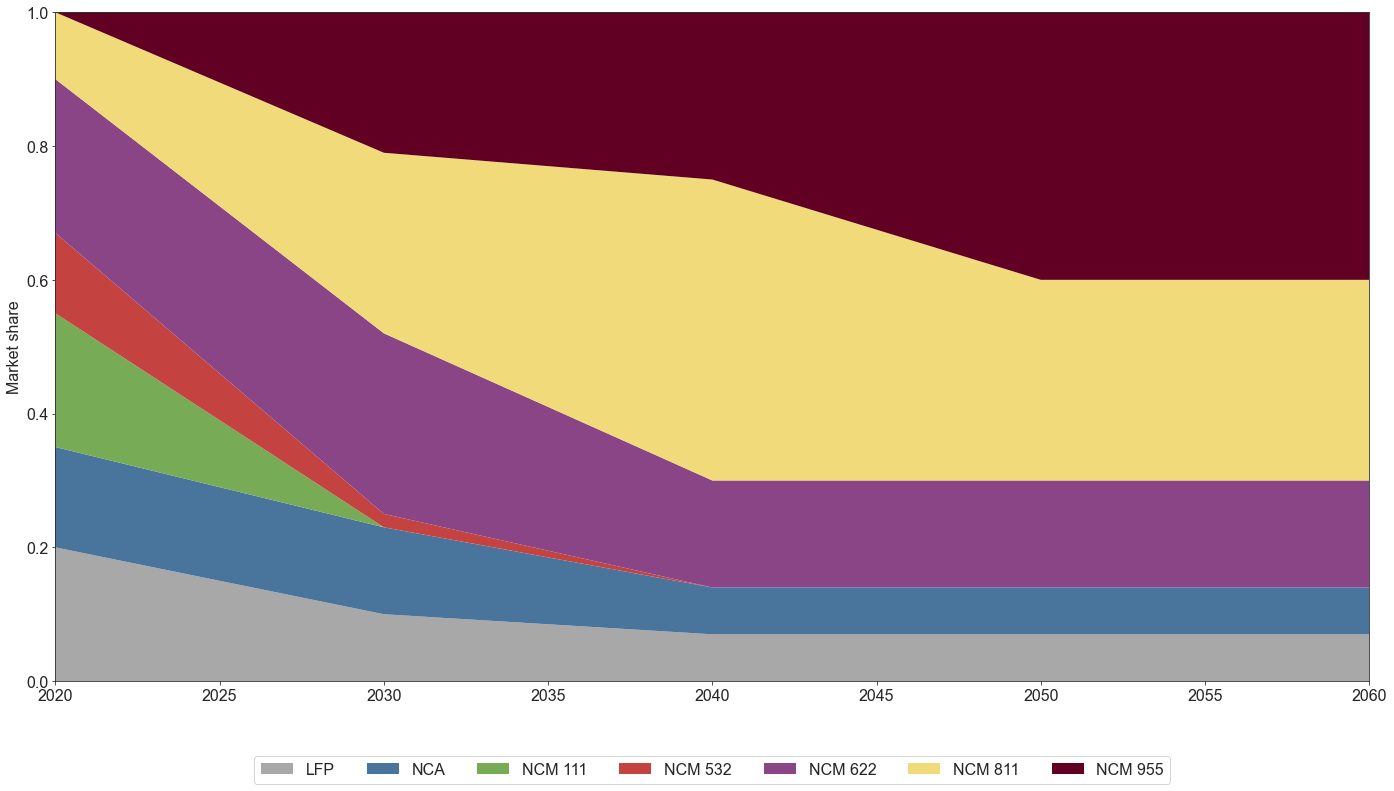

In [24]:
inter = boh.transpose()
inter.drop('Li-S', axis = 1, inplace = True)
inter.plot.area(cmap = my_map,figsize =(19.2,11), fontsize = 16, linewidth = 0)
#plt.legend(bbox_to_anchor = (1,1))
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=8, fontsize = 16)

plt.ylim(0,1)
plt.xlim(2020,2060)
plt.tight_layout()
plt.ylabel('Market share', fontsize = 16 )
#plt.savefig('chemistries.jpeg', pad = 5, dpi = 1200)
#plt.savefig('chemistries_lowres.jpeg', dpi = 400, pad_inches = 10)
plt.show()

### Read in the battery sizes from the EV database

In [25]:
batt_size = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Batt_size', skiprows=2, nrows = 7, usecols = 'C:AW')
batt_size = batt_size.set_index("Segment")

In [26]:
batt_size = batt_size.interpolate(method = "linear", axis = 1)


### Try to calculate number of batteries of each chemistry  in each segment.
### Useful dfs --> BEV_stock_segment, chemistries, batt_size

## Reindex dataframes

In [27]:
ind = pd.MultiIndex.from_product([BEV_stockadd_base_SSP2.index.to_list(), chemistries.index.to_list()])

In [28]:
BEV_stockadd_base_SSP2 = BEV_stockadd_base_SSP2.multiply(1000000)

In [29]:
BEV_segment_chemistry_base_SSP2 = BEV_stockadd_base_SSP2

In [30]:
BEV_segment_chemistry_base_SSP2 = BEV_segment_chemistry_base_SSP2.reindex(ind, level = 0)

In [31]:
BEV_segment_chemistry_base_SSP2 = BEV_segment_chemistry_base_SSP2.multiply(chemistries, level = 1)
#BEV_segment_chemistry_base_SSP2

### Now, I assign a material content to each battery chemistry
### This will be done in kg/kWh. 




### Next step is to assign a battery size to each segment and calculate the total capacity in the BEVs stock


In [32]:
material = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Material composition', skiprows=1, nrows = 8, usecols = 'B:M')
material = material.set_index(['chemistry'])

material_eol = material

In [33]:
material = material.transpose()

In [34]:
batt_size = batt_size.round()

In [35]:
mean_batt = batt_size
mean_batt

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
Segment,,,,,,,,,,,,,,,,,,,,,
A,25.0,25.0,26.0,26.0,27.0,27.0,28.0,28.0,29.0,29.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
B,45.0,45.0,46.0,47.0,47.0,48.0,49.0,50.0,50.0,51.0,...,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0
C,56.0,56.0,57.0,57.0,58.0,58.0,59.0,59.0,60.0,60.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0
D,71.0,72.0,73.0,74.0,75.0,76.0,76.0,77.0,78.0,79.0,...,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0,103.0
E,75.0,77.0,78.0,80.0,82.0,83.0,85.0,87.0,88.0,90.0,...,133.0,133.0,133.0,133.0,133.0,133.0,133.0,133.0,133.0,133.0
F,92.0,93.0,93.0,94.0,95.0,95.0,96.0,97.0,97.0,98.0,...,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0
J,78.0,79.0,80.0,81.0,82.0,83.0,85.0,86.0,87.0,88.0,...,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0


In [36]:
mean_batt = mean_batt.reset_index()

In [37]:
new = pd.MultiIndex.from_product([BEV_stockadd_base_SSP2.index.to_list(), chemistries.index.to_list(), material.index.to_list()])

In [38]:
BEV_seg_chem_size_base_SSP2 = BEV_segment_chemistry_base_SSP2
BEV_seg_chem_size_base_SSP2 = BEV_seg_chem_size_base_SSP2.reindex(new)

In [39]:
BEV_stockadd_RCP26_SSP2 = BEV_stockadd_RCP26_SSP2.multiply(1000000)
BEV_stockadd_RCP26_SSP1 = BEV_stockadd_RCP26_SSP1.multiply(1000000)
BEV_stockadd_base_SSP1 = BEV_stockadd_base_SSP1.multiply(1000000)


In [40]:
BEV_base_SSP1_seg_chem = BEV_stockadd_base_SSP1
BEV_base_SSP1_seg_chem = BEV_base_SSP1_seg_chem.reindex(ind, level = 0)
BEV_base_SSP1_seg_chem = BEV_base_SSP1_seg_chem.multiply(chemistries, level = 1)

BEV_base_SSP1_seg_chem_mat = BEV_base_SSP1_seg_chem.reindex(new)

In [41]:
BEV_RCP26_SSP2_seg_chem = BEV_stockadd_RCP26_SSP2
BEV_RCP26_SSP2_seg_chem = BEV_RCP26_SSP2_seg_chem.reindex(ind, level = 0)
BEV_RCP26_SSP2_seg_chem = BEV_RCP26_SSP2_seg_chem.multiply(chemistries, level = 1)

BEV_RCP26_SSP2_seg_chem_mat = BEV_RCP26_SSP2_seg_chem.reindex(new)

In [42]:
BEV_RCP26_SSP1_seg_chem = BEV_stockadd_RCP26_SSP1
BEV_RCP26_SSP1_seg_chem = BEV_RCP26_SSP1_seg_chem.reindex(ind, level = 0)
BEV_RCP26_SSP1_seg_chem = BEV_RCP26_SSP1_seg_chem.multiply(chemistries, level = 1)

BEV_RCP26_SSP1_seg_chem_mat = BEV_RCP26_SSP1_seg_chem.reindex(new)

In [43]:
mean_batt.drop('Segment', inplace = True, axis = 1)

In [44]:
material = material.transpose()
material = material.stack()
material = material.to_frame()
material.index.names = ['','']
material.columns = ['']

In [45]:
years = BEV_seg_chem_size_base_SSP2.columns

In [46]:
rep = pd.concat([material]*(len(chemistries.index)-1))
rep.index = new
#rep.columns = ['mean']

In [47]:
rep.index = new

In [48]:
new

MultiIndex([(0,  'NCA',       'Li'),
            (0,  'NCA',       'Co'),
            (0,  'NCA',       'Ni'),
            (0,  'NCA',       'Mn'),
            (0,  'NCA',       'Cu'),
            (0,  'NCA',       'Al'),
            (0,  'NCA', 'Graphite'),
            (0,  'NCA',  'Al_pack'),
            (0,  'NCA',    'Steel'),
            (0,  'NCA',  'Cu_pack'),
            ...
            (6, 'Li-S',       'Co'),
            (6, 'Li-S',       'Ni'),
            (6, 'Li-S',       'Mn'),
            (6, 'Li-S',       'Cu'),
            (6, 'Li-S',       'Al'),
            (6, 'Li-S', 'Graphite'),
            (6, 'Li-S',  'Al_pack'),
            (6, 'Li-S',    'Steel'),
            (6, 'Li-S',  'Cu_pack'),
            (6, 'Li-S', 'Plastics')],
           length=616)

In [49]:
rep.columns = [2015]

In [50]:
rep=rep.reindex(columns=mean_batt.columns, method='ffill')

In [51]:
total_capacity = mean_batt.reindex(ind, level = 0)
total_material = mean_batt.reindex(new, level=0).mul(rep)

## Calculate total capacity installed and yearly addition. Then, convert to GWh

In [52]:
addcap_RCP26_SSP1 =  total_capacity.values * BEV_RCP26_SSP1_seg_chem

addcap_RCP26_SSP2 = total_capacity.values * BEV_RCP26_SSP2_seg_chem

addcap_base_SSP1 = total_capacity.values * BEV_base_SSP1_seg_chem

addcap_base_SSP2 = total_capacity.values * BEV_segment_chemistry_base_SSP2


In [53]:
addcap_RCP26_SSP1 = addcap_RCP26_SSP1.reset_index()
addcap_RCP26_SSP1 = addcap_RCP26_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
addcap_RCP26_SSP1 = addcap_RCP26_SSP1.set_index(['segment','chemistry'])

addcap_RCP26_SSP2 = addcap_RCP26_SSP2.reset_index()
addcap_RCP26_SSP2 = addcap_RCP26_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
addcap_RCP26_SSP2 = addcap_RCP26_SSP2.set_index(['segment','chemistry'])


addcap_base_SSP1 = addcap_base_SSP1.reset_index()
addcap_base_SSP1 = addcap_base_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
addcap_base_SSP1 = addcap_base_SSP1.set_index(['segment','chemistry'])

addcap_base_SSP2 = addcap_base_SSP2.reset_index()
addcap_base_SSP2 = addcap_base_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry' }) 
addcap_base_SSP2 = addcap_base_SSP2.set_index(['segment','chemistry'])





## Calculate stock additions of materials at any given year, for each segment and chemistry

In [54]:
stockadd_BEV_base_SSP2 = total_material.values * BEV_seg_chem_size_base_SSP2

stockadd_BEV_base_SSP1 = total_material.values * BEV_base_SSP1_seg_chem_mat

stockadd_BEV_RCP26_SSP2 = total_material.values * BEV_RCP26_SSP2_seg_chem_mat

stockadd_BEV_RCP26_SSP1 = total_material.values * BEV_RCP26_SSP1_seg_chem_mat





In [55]:
stockadd_BEV_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1.reset_index()
stockadd_BEV_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
stockadd_BEV_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1.set_index(['segment','chemistry','material'])

In [56]:
stockadd_BEV_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2.reset_index()
stockadd_BEV_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' }) 
stockadd_BEV_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2.set_index(['segment','chemistry','material'])

In [57]:
stockadd_BEV_base_SSP1 = stockadd_BEV_base_SSP1.reset_index()
stockadd_BEV_base_SSP1 = stockadd_BEV_base_SSP1.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' })
stockadd_BEV_base_SSP1 = stockadd_BEV_base_SSP1.set_index(['segment','chemistry','material'])

In [58]:
stockadd_BEV_base_SSP2 = stockadd_BEV_base_SSP2.reset_index()
stockadd_BEV_base_SSP2 = stockadd_BEV_base_SSP2.rename(columns={'level_0': 'segment', 'level_1': 'chemistry', 'level_2': 'material' })
stockadd_BEV_base_SSP2 = stockadd_BEV_base_SSP2.set_index(['segment','chemistry','material'])

### Calculate yearly addition to the material stock, then convert it to Mt

## Import PHEVs data

In [59]:
addcap_PHEV_base_SSP1 = pd.read_pickle('PHEV_cap_base_SSP1.pkl')
addcap_PHEV_base_SSP2 = pd.read_pickle('PHEV_cap_base_SSP2.pkl')
addcap_PHEV_RCP26_SSP1 = pd.read_pickle('PHEV_cap_RCP26_SSP1.pkl')
addcap_PHEV_RCP26_SSP2 = pd.read_pickle('PHEV_cap_RCP26_SSP2.pkl')

addcap_PHEV_base_LED = pd.read_pickle('PHEV_cap_base_LED.pkl')
addcap_PHEV_RCP26_LED = pd.read_pickle('PHEV_cap_RCP26_LED.pkl')

matadd_PHEV_base_SSP1 = pd.read_pickle('stock_PHEV_base_SSP1.pkl')
matadd_PHEV_base_SSP2 = pd.read_pickle('stock_PHEV_base_SSP2.pkl')
matadd_PHEV_RCP26_SSP1 = pd.read_pickle('stock_PHEV_RCP26_SSP1.pkl')
matadd_PHEV_RCP26_SSP2 = pd.read_pickle('stock_PHEV_RCP26_SSP2.pkl')

matadd_PHEV_base_LED = pd.read_pickle('stock_PHEV_base_LED.pkl')
matadd_PHEV_RCP26_LED = pd.read_pickle('stock_PHEV_RCP26_LED.pkl')

## Testing survival rates

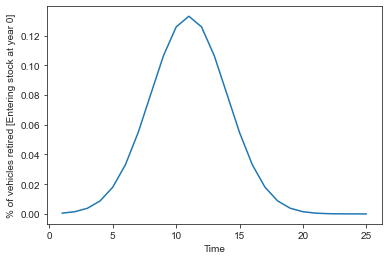

In [60]:
mu = 11
sigma = 3
x = np.linspace(1, 25, 25)
#y = np.linspace(mu-5*sigma, mu+4*sigma, 15)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel('% of vehicles retired [Entering stock at year 0]')
plt.xlabel('Time')
#plt.savefig('Retirement curves.jpg', dpi = 600)
plt.show()


In [61]:
prob = pd.DataFrame(stats.norm.pdf(x, mu, sigma))
prob = prob.reset_index()
prob['index'] = prob['index'] + 1 
prob = prob.set_index('index')

In [62]:
prob

,0
index,
1,0.000514
2,0.001477
3,0.003799
4,0.008741
5,0.017997
6,0.033159
7,0.054670
8,0.080657
9,0.106483


In [63]:
prob.columns = ['share']

## Calculate eol outflows

In [64]:
index = pd.MultiIndex.from_product([BEV_stockadd_base_SSP2.index.to_list(), chemistries.index.to_list()])

## Calculate EOL both in terms of total capacity retired and material flows embodied 

In [65]:
empty_df = calculate_eol(index, years, 2015, prob, addcap_base_SSP1)

## Let's start with capacity, in kWh

In [66]:
cap_eol_PHEV_base_SSP2 = empty_df
cap_eol_PHEV_base_SSP1 = empty_df
cap_eol_PHEV_RCP26_SSP2 = empty_df
cap_eol_PHEV_RCP26_SSP1 = empty_df

cap_eol_PHEV_base_LED = empty_df
cap_eol_PHEV_RCP26_LED = empty_df

for col in cap_eol_PHEV_base_SSP2.columns:
    cap_eol_PHEV_base_SSP2[col].values[:] = 0
    cap_eol_PHEV_base_SSP1[col].values[:] = 0
    cap_eol_PHEV_RCP26_SSP2[col].values[:] = 0
    cap_eol_PHEV_RCP26_SSP1[col].values[:] = 0
    cap_eol_PHEV_base_LED[col].values[:] = 0
    cap_eol_PHEV_RCP26_LED[col].values[:] = 0


In [67]:
cap_total_eol_base_SSP2 = empty_df
cap_total_eol_base_SSP1 = empty_df
cap_total_eol_RCP26_SSP2 = empty_df
cap_total_eol_RCP26_SSP1 = empty_df

for col in cap_total_eol_base_SSP2.columns:
    cap_total_eol_base_SSP2[col].values[:] = 0
    cap_total_eol_base_SSP1[col].values[:] = 0
    cap_total_eol_RCP26_SSP2[col].values[:] = 0
    cap_total_eol_RCP26_SSP1[col].values[:] = 0
    
    

In [68]:
for n in range(len(years)):
    eol_base_SSP2 =  calculate_eol(index, years, years[n], prob, addcap_base_SSP2)
    cap_total_eol_base_SSP2 = cap_total_eol_base_SSP2.add(eol_base_SSP2, fill_value = 0)
    eol_PHEV_base_SSP2 = calculate_eol(index, years, years[n], prob, addcap_PHEV_base_SSP2)
    cap_eol_PHEV_base_SSP2 = cap_eol_PHEV_base_SSP2.add(eol_PHEV_base_SSP2, fill_value = 0) 
    
    eol_base_SSP1 =  calculate_eol(index, years, years[n], prob, addcap_base_SSP1)
    cap_total_eol_base_SSP1 = cap_total_eol_base_SSP1.add(eol_base_SSP1, fill_value = 0)
    eol_PHEV_base_SSP1 = calculate_eol(index, years, years[n], prob, addcap_PHEV_base_SSP1)
    cap_eol_PHEV_base_SSP1 = cap_eol_PHEV_base_SSP1.add(eol_PHEV_base_SSP1, fill_value = 0) 
    
    
    eol_RCP26_SSP2 =  calculate_eol(index, years, years[n], prob, addcap_RCP26_SSP2)
    cap_total_eol_RCP26_SSP2 = cap_total_eol_RCP26_SSP2.add(eol_RCP26_SSP2, fill_value = 0)
    eol_PHEV_RCP26_SSP2 = calculate_eol(index, years, years[n], prob, addcap_PHEV_RCP26_SSP2)
    cap_eol_PHEV_RCP26_SSP2 = cap_eol_PHEV_RCP26_SSP2.add(eol_PHEV_RCP26_SSP2, fill_value = 0) 
    
    eol_RCP26_SSP1 =  calculate_eol(index, years, years[n], prob, addcap_RCP26_SSP1)
    cap_total_eol_RCP26_SSP1 = cap_total_eol_RCP26_SSP1.add(eol_RCP26_SSP1, fill_value = 0)
    eol_PHEV_RCP26_SSP1 = calculate_eol(index, years, years[n], prob, addcap_PHEV_RCP26_SSP1)
    cap_eol_PHEV_RCP26_SSP1 = cap_eol_PHEV_RCP26_SSP1.add(eol_PHEV_RCP26_SSP1, fill_value = 0) 

## Now, let's look at the flows in kg

In [69]:
mat_PHEV_eol_base_SSP2 = cap_eol_PHEV_base_SSP2.reindex(new)
mat_PHEV_eol_base_SSP1 = cap_eol_PHEV_base_SSP1.reindex(new) 
mat_PHEV_eol_RCP26_SSP2 = cap_eol_PHEV_RCP26_SSP2.reindex(new) 
mat_PHEV_eol_RCP26_SSP1 = cap_eol_PHEV_RCP26_SSP1.reindex(new)

In [70]:
mat_eol_base_SSP2 = cap_total_eol_base_SSP2.reindex(new)
mat_eol_base_SSP1 = cap_total_eol_base_SSP1.reindex(new)
mat_eol_RCP26_SSP2 = cap_total_eol_RCP26_SSP2.reindex(new)
mat_eol_RCP26_SSP1 = cap_total_eol_RCP26_SSP1.reindex(new)


In [71]:
material_eol = material_eol.stack()
material_eol = material_eol.to_frame()
material_eol = pd.concat([material_eol]*(len(chemistries.index)-1)) 
material_eol.index = new

material_eol_rep = pd.concat([material_eol]*70, axis = 1)
material_eol_rep.columns = mat_eol_base_SSP2.columns

In [72]:
mat_PHEV_eol_base_SSP2 = mat_PHEV_eol_base_SSP2.mul(material_eol_rep)  
mat_PHEV_eol_base_SSP1 = mat_PHEV_eol_base_SSP1.mul(material_eol_rep)   
mat_PHEV_eol_RCP26_SSP2 = mat_PHEV_eol_RCP26_SSP2.mul(material_eol_rep) 
mat_PHEV_eol_RCP26_SSP1 = mat_PHEV_eol_RCP26_SSP1.mul(material_eol_rep) 

In [73]:
matflows_eol_base_SSP2 = mat_eol_base_SSP2.mul(material_eol_rep) 
matflows_eol_base_SSP1 = mat_eol_base_SSP1.mul(material_eol_rep)
matflows_eol_RCP26_SSP2 = mat_eol_RCP26_SSP2.mul(material_eol_rep)
matflows_eol_RCP26_SSP1 = mat_eol_RCP26_SSP1.mul(material_eol_rep)

## Assign indexes and convert to GWh and Mt

In [74]:
mat_PHEV_eol_base_SSP2 = assign_index_material(mat_PHEV_eol_base_SSP2)
mat_PHEV_eol_base_SSP1 = assign_index_material(mat_PHEV_eol_base_SSP1)   
mat_PHEV_eol_RCP26_SSP2 = assign_index_material(mat_PHEV_eol_RCP26_SSP2)
mat_PHEV_eol_RCP26_SSP1 = assign_index_material(mat_PHEV_eol_RCP26_SSP1)

In [75]:
matflows_eol_base_SSP2 = assign_index_material(matflows_eol_base_SSP2)
matflows_eol_base_SSP1 = assign_index_material(matflows_eol_base_SSP1)
matflows_eol_RCP26_SSP2 = assign_index_material(matflows_eol_RCP26_SSP2)
matflows_eol_RCP26_SSP1 = assign_index_material(matflows_eol_RCP26_SSP1) 

In [76]:
cap_eol_PHEV_RCP26_SSP2 = assign_index_capacity(cap_eol_PHEV_RCP26_SSP2)
cap_eol_PHEV_RCP26_SSP1 = assign_index_capacity(cap_eol_PHEV_RCP26_SSP1)
cap_eol_PHEV_base_SSP1 = assign_index_capacity(cap_eol_PHEV_base_SSP1)
cap_eol_PHEV_base_SSP2 = assign_index_capacity(cap_eol_PHEV_base_SSP2)

In [77]:
cap_total_eol_RCP26_SSP2 = assign_index_capacity(cap_total_eol_RCP26_SSP2)
cap_total_eol_RCP26_SSP1 = assign_index_capacity(cap_total_eol_RCP26_SSP1)
cap_total_eol_base_SSP1 = assign_index_capacity(cap_total_eol_base_SSP1)
cap_total_eol_base_SSP2 = assign_index_capacity(cap_total_eol_base_SSP2)

## Export EOL results in Mton and GWh

## Now it gets challenging. Visualization

## Preparing data and plotting material additions to stock

## New test figure ##

In [78]:
addcap_base_LED = pd.read_pickle('addcap_base_LED.pkl')
addcap_RCP26_LED = pd.read_pickle('addcap_RCP26_LED.pkl')

In [79]:

captotal_eol_base_LED = pd.read_pickle('captotal_eol_base_LED.pkl')
captotal_eol_RCP26_LED = pd.read_pickle('captotal_eol_RCP26_LED.pkl')

matflow_eol_base_LED = pd.read_pickle('matflow_eol_base_LED.pkl')
matflow_eol_RCP26_LED = pd.read_pickle('matflow_eol_RCP26_LED.pkl')

In [80]:
matadd_base_LED = pd.read_pickle('stockadd_BEV_base_LED.pkl')
matadd_RCP26_LED = pd.read_pickle('stockadd_BEV_RCP26_LED.pkl')

#matadd_base_LED_PHEV = pd.read_pickle('stock_PHEV_base_LED.pkl')
#matadd_RCP26_LED_PHEV = pd.read_pickle('stock_PHEV_RCP26_LED.pkl')

##matadd_base_LED = matadd_base_LED_PHEV + matadd_base_LED_BEV
#matadd_RCP26_LED = matadd_RCP26_LED_PHEV + matadd_RCP26_LED_BEV


In [81]:
material_add_tot_base_SSP2 = stockadd_BEV_base_SSP2.groupby('material').sum()+matadd_PHEV_base_SSP2.groupby('material').sum()
material_add_tot_base_SSP1 = stockadd_BEV_base_SSP1.groupby('material').sum()+matadd_PHEV_base_SSP1.groupby('material').sum()
material_add_tot_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2.groupby('material').sum()+matadd_PHEV_RCP26_SSP2.groupby('material').sum()
material_add_tot_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1.groupby('material').sum()+matadd_PHEV_RCP26_SSP1.groupby('material').sum()


material_add_tot_base_LED = matadd_base_LED.groupby('material').sum()
material_add_tot_RCP26_LED = matadd_RCP26_LED.groupby('material').sum()

In [82]:
material_out_tot_base_SSP2 = matflows_eol_base_SSP2.groupby('material').sum()+mat_PHEV_eol_base_SSP2.groupby('material').sum()
material_out_tot_base_SSP1 = matflows_eol_base_SSP1.groupby('material').sum()+mat_PHEV_eol_base_SSP1.groupby('material').sum()
material_out_tot_RCP26_SSP2 = matflows_eol_RCP26_SSP2.groupby('material').sum()+mat_PHEV_eol_RCP26_SSP2.groupby('material').sum()
material_out_tot_RCP26_SSP1 = matflows_eol_RCP26_SSP1.groupby('material').sum()+mat_PHEV_eol_RCP26_SSP1.groupby('material').sum()

material_out_tot_base_LED = matflow_eol_base_LED.groupby('material').sum()
material_out_tot_RCP26_LED = matflow_eol_RCP26_LED.groupby('material').sum()

In [83]:
material_add_tot_base_SSP2.loc['Cu'] = material_add_tot_base_SSP2.loc['Cu'] +  material_add_tot_base_SSP2.loc['Cu_pack']
material_add_tot_base_SSP2.loc['Al'] = material_add_tot_base_SSP2.loc['Al'] +  material_add_tot_base_SSP2.loc['Al_pack']

material_add_tot_base_SSP1.loc['Cu'] = material_add_tot_base_SSP1.loc['Cu'] +  material_add_tot_base_SSP1.loc['Cu_pack']
material_add_tot_base_SSP1.loc['Al'] = material_add_tot_base_SSP1.loc['Al'] +  material_add_tot_base_SSP1.loc['Al_pack']

## RCP2.6
material_add_tot_RCP26_SSP2.loc['Cu'] = material_add_tot_RCP26_SSP2.loc['Cu'] +  material_add_tot_RCP26_SSP2.loc['Cu_pack']
material_add_tot_RCP26_SSP2.loc['Al'] = material_add_tot_RCP26_SSP2.loc['Al'] +  material_add_tot_RCP26_SSP2.loc['Al_pack']

material_add_tot_RCP26_SSP1.loc['Cu'] = material_add_tot_RCP26_SSP1.loc['Cu'] +  material_add_tot_RCP26_SSP1.loc['Cu_pack']
material_add_tot_RCP26_SSP1.loc['Al'] = material_add_tot_RCP26_SSP1.loc['Al'] +  material_add_tot_RCP26_SSP1.loc['Al_pack']


## LED
material_add_tot_base_LED.loc['Cu'] = material_add_tot_base_LED.loc['Cu'] +  material_add_tot_base_LED.loc['Cu_pack']
material_add_tot_base_LED.loc['Al'] = material_add_tot_base_LED.loc['Al'] +  material_add_tot_base_LED.loc['Al_pack']

material_add_tot_RCP26_LED.loc['Cu'] = material_add_tot_RCP26_LED.loc['Cu'] +  material_add_tot_RCP26_LED.loc['Cu_pack']
material_add_tot_RCP26_LED.loc['Al'] = material_add_tot_RCP26_LED.loc['Al'] +  material_add_tot_RCP26_LED.loc['Al_pack']




In [84]:
material_add_tot_base_SSP2 = material_add_tot_base_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)
material_add_tot_base_SSP1 = material_add_tot_base_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)
material_add_tot_RCP26_SSP2 = material_add_tot_RCP26_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)
material_add_tot_RCP26_SSP1 = material_add_tot_RCP26_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)

material_add_tot_base_LED = material_add_tot_base_LED.drop(['Cu_pack','Al_pack'], axis = 0)
material_add_tot_RCP26_LED = material_add_tot_RCP26_LED.drop(['Cu_pack','Al_pack'], axis = 0)

In [85]:
material_out_tot_base_SSP2.loc['Cu'] = material_out_tot_base_SSP2.loc['Cu'] +  material_out_tot_base_SSP2.loc['Cu_pack']
material_add_tot_base_SSP2.loc['Al'] = material_out_tot_base_SSP2.loc['Al'] +  material_out_tot_base_SSP2.loc['Al_pack']

material_out_tot_base_SSP1.loc['Cu'] = material_out_tot_base_SSP1.loc['Cu'] +  material_out_tot_base_SSP1.loc['Cu_pack']
material_out_tot_base_SSP1.loc['Al'] = material_out_tot_base_SSP1.loc['Al'] +  material_out_tot_base_SSP1.loc['Al_pack']

material_out_tot_RCP26_SSP2.loc['Cu'] = material_out_tot_RCP26_SSP2.loc['Cu'] +  material_out_tot_RCP26_SSP2.loc['Cu_pack']
material_out_tot_RCP26_SSP2.loc['Al'] = material_out_tot_RCP26_SSP2.loc['Al'] +  material_out_tot_RCP26_SSP2.loc['Al_pack']

material_out_tot_RCP26_SSP1.loc['Cu'] = material_out_tot_RCP26_SSP1.loc['Cu'] +  material_out_tot_RCP26_SSP1.loc['Cu_pack']
material_out_tot_RCP26_SSP1.loc['Al'] = material_out_tot_RCP26_SSP1.loc['Al'] +  material_out_tot_RCP26_SSP1.loc['Al_pack']



material_out_tot_base_LED.loc['Cu'] = material_out_tot_base_LED.loc['Cu'] +  material_out_tot_base_LED.loc['Cu_pack']
material_out_tot_base_LED.loc['Al'] = material_out_tot_base_LED.loc['Al'] +  material_out_tot_base_LED.loc['Al_pack']


material_out_tot_RCP26_LED.loc['Cu'] = material_out_tot_RCP26_LED.loc['Cu'] +  material_out_tot_RCP26_LED.loc['Cu_pack']
material_out_tot_RCP26_LED.loc['Al'] = material_out_tot_RCP26_LED.loc['Al'] +  material_out_tot_RCP26_LED.loc['Al_pack']



material_out_tot_base_SSP2 = material_out_tot_base_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)
material_out_tot_base_SSP1 = material_out_tot_base_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)
material_out_tot_RCP26_SSP2 = material_out_tot_RCP26_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)
material_out_tot_RCP26_SSP1 = material_out_tot_RCP26_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)

material_out_tot_base_LED = material_out_tot_base_LED.drop(['Cu_pack','Al_pack'], axis = 0)
material_out_tot_RCP26_LED = material_out_tot_RCP26_LED.drop(['Cu_pack','Al_pack'], axis = 0)

In [86]:
material_out_tot_base_SSP2 = material_out_tot_base_SSP2.mul(-1)
material_out_tot_base_SSP1 = material_out_tot_base_SSP1.mul(-1)
material_out_tot_RCP26_SSP2 = material_out_tot_RCP26_SSP2.mul(-1)
material_out_tot_RCP26_SSP1 = material_out_tot_RCP26_SSP1.mul(-1)

material_out_tot_base_LED = material_out_tot_base_LED.mul(-1)
material_out_tot_RCP26_LED = material_out_tot_RCP26_LED.mul(-1)

In [87]:
#mining_rate_2019 = pd.DataFrame(data = [77000000,0,140000000,0,0,2700000000,0,0,1100000000])
#pd.DataFrame(data = [77000000, 20300000000,2700000000,140000000,0,0,64000000000,20000000000,1100000000])
mining_rate_2019 = pd.DataFrame(data = [0,144000000,0,1100000000,82000000,0,27000000000,0,0])
mining_rate_2019 = mining_rate_2019.transpose()
#mining_rate_2019.columns = ['Li','Mn','Co','Plastics','Steel','Ni','Al','Cu','Graphite']
mining_rate_2019.columns = ['Al','Co','Cu','Graphite','Li','Mn','Ni','Plastics','Steel']


mining_rate_2025 = pd.DataFrame(data = [0,250000000,0,1100000000,155000000,0,27000000000,0,0])
mining_rate_2025 = mining_rate_2025.transpose()
mining_rate_2025.columns = ['Al','Co','Cu','Graphite','Li','Mn','Ni','Plastics','Steel']

In [88]:
mining_rate_2019.divide(1e9)

,Al,Co,Cu,Graphite,Li,Mn,Ni,Plastics,Steel
0,0.0,0.144,0.0,1.1,0.082,0.0,27.0,0.0,0.0


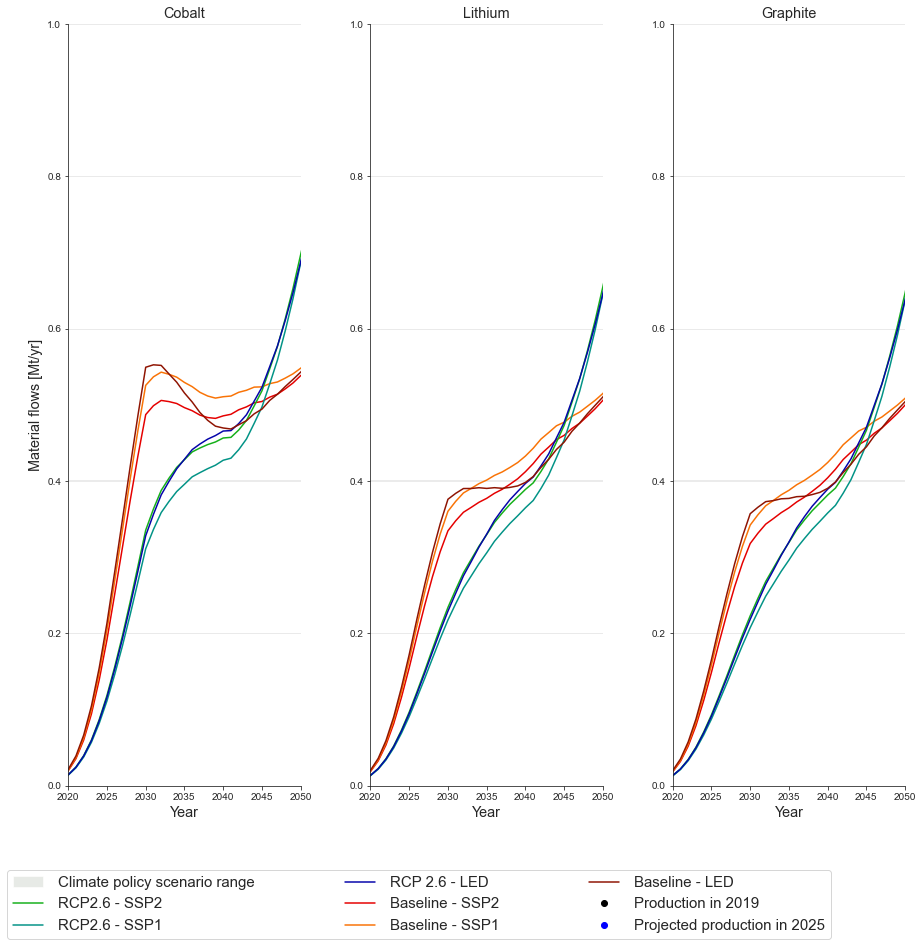

In [89]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))



fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_title('Cobalt', size = 'x-large')
ax[1].set_title('Lithium', size = 'x-large')
ax[2].set_title('Graphite', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[1].set_xlim(2020,2050)
ax[2].set_xlim(2020,2050)


ax[0].yaxis.grid(color = 'black', alpha = 0.1)
ax[1].yaxis.grid(color = 'black', alpha = 0.1)
ax[2].yaxis.grid(color = 'black', alpha = 0.1)

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].set_xlabel('Year', size = 'x-large')
ax[1].set_xlabel('Year', size = 'x-large')
ax[2].set_xlabel('Year', size = 'x-large')


x = material_add_tot_base_SSP2.columns.values
x = np.array(x, dtype = float)

y1 = material_out_tot_base_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Co'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Co'].divide(1e9))

ax[0].plot(x,y1, color = linecols[0])
ax[0].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9))

ax[0].plot(x,y3, color = linecols[2])
ax[0].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Co'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Co'].divide(1e9))

ax[0].plot(x,y5, color = linecols[5])
ax[0].plot(x,y6, color = linecols[4])

## 3

y1 = material_out_tot_base_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Li'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Li'].divide(1e9))

ax[1].plot(x,y1, color = linecols[0])
ax[1].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9))

ax[1].plot(x,y3, color = linecols[2])
ax[1].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Li'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Li'].divide(1e9))

ax[1].plot(x,y5, color = linecols[5])
ax[1].plot(x,y6, color = linecols[4])



## 9
y1 = material_out_tot_base_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Graphite'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Graphite'].divide(1e9))

ax[2].plot(x,y1, color = linecols[0])
ax[2].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9))

ax[2].plot(x,y3, color = linecols[2])
ax[2].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Graphite'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9))

ax[2].plot(x,y5, color = linecols[5])
ax[2].plot(x,y6, color = linecols[4])

### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 3, markerscale = 2)
gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

gridlines = ax[1].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)
gridlines = ax[2].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

#plt.savefig('potential_recovery.jpg', dpi = 400, bbox_inches = 'tight')

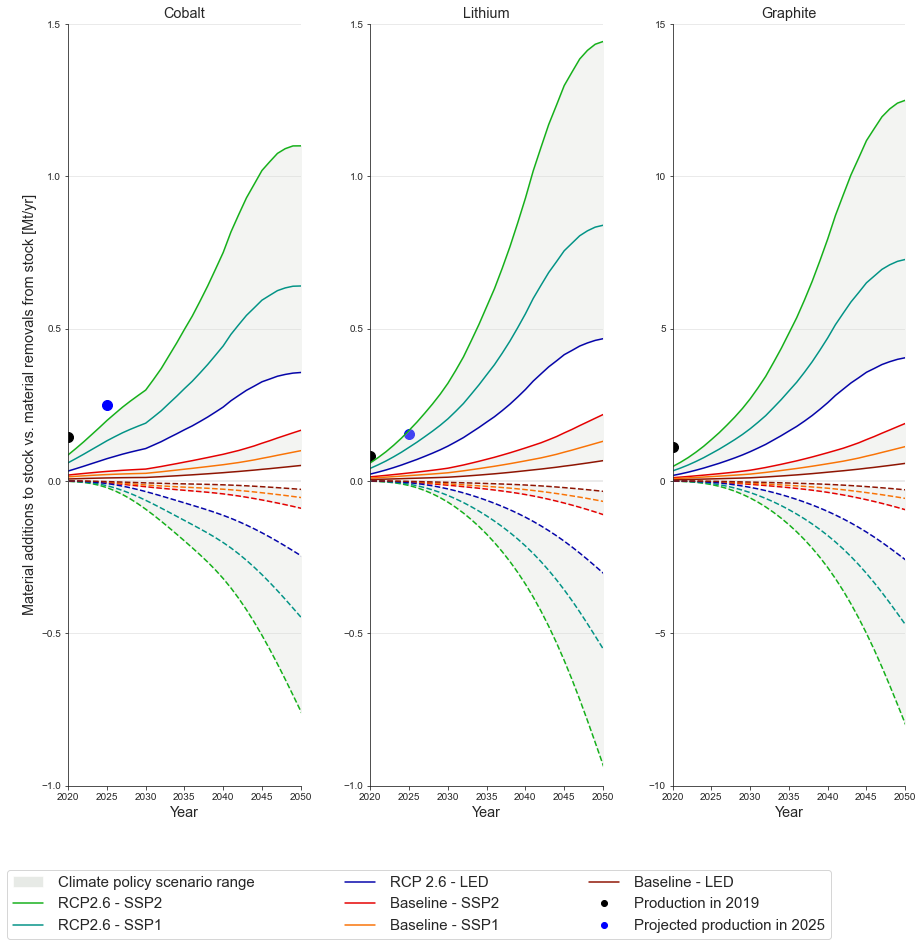

In [90]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))



fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_title('Cobalt', size = 'x-large')
ax[1].set_title('Lithium', size = 'x-large')
ax[2].set_title('Graphite', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[1].set_xlim(2020,2050)
ax[2].set_xlim(2020,2050)

ax[0].set_ylim(-1,1.5)
ax[1].set_ylim(-1,1.5)
ax[2].set_ylim(-10,15)

ax[0].yaxis.grid(color = 'black', alpha = 0.1)
ax[1].yaxis.grid(color = 'black', alpha = 0.1)
ax[2].yaxis.grid(color = 'black', alpha = 0.1)


ax[0].set_ylabel('Material additions to stock vs. material removals from stock [Mt/yr]', size = 'x-large')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].set_xlabel('Year', size = 'x-large')
ax[1].set_xlabel('Year', size = 'x-large')
ax[2].set_xlabel('Year', size = 'x-large')


x = material_add_tot_base_SSP2.columns.values
x = np.array(x, dtype = float)

y1 = material_add_tot_base_SSP2.loc['Co'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Co'].divide(1e9)

ax[0].plot(x,y1, color = linecols[0])
ax[0].plot(x,y2, color = linecols[1])

y3 = material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9)

ax[0].scatter(2020,mining_rate_2019['Co'].divide(1e9), color = 'black', s = 100)
ax[0].scatter(2025,mining_rate_2025['Co'].divide(1e9), color = 'blue', s = 100)

ax[0].plot(x,y3, color = linecols[2])
ax[0].plot(x,y4, color = linecols[3])

y5 = material_add_tot_RCP26_LED.loc['Co'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Co'].divide(1e9)

ax[0].plot(x,y5, color = linecols[5])
ax[0].plot(x,y6, color = linecols[4])

ax[0].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[0].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)


### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Co'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[0].plot(x,y2, color = linecols[1], linestyle = 'dashed')


y3 = material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[0].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Co'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Co'].divide(1e9)[:46]

ax[0].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[0].plot(x,y6, color = linecols[4], linestyle = 'dashed')

ax[0].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[0].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)


## 3

y1 = material_add_tot_base_SSP2.loc['Li'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Li'].divide(1e9)

ax[1].plot(x,y1, color = linecols[0])
ax[1].plot(x,y2, color = linecols[1])

y3 = material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9)

ax[1].plot(x,y3, color = linecols[2])
ax[1].plot(x,y4, color = linecols[3])

ax[1].scatter(2020,mining_rate_2019['Li'].divide(1e9), color = 'black', s = 100)
ax[1].scatter(2025,mining_rate_2025['Li'].divide(1e9), color = 'blue', s = 100)

y5 = material_add_tot_RCP26_LED.loc['Li'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Li'].divide(1e9)

ax[1].plot(x,y5, color = linecols[5])
ax[1].plot(x,y6, color = linecols[4])

ax[1].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[1].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Li'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[1].plot(x,y2, color = linecols[1], linestyle = 'dashed')

y3 = material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[1].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Li'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Li'].divide(1e9)[:46]

ax[1].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[1].plot(x,y6, color = linecols[4], linestyle = 'dashed')

ax[1].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[1].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

## 9
y1 = material_add_tot_base_SSP2.loc['Graphite'].divide(1e9)
y2 = material_add_tot_base_SSP1.loc['Graphite'].divide(1e9)

ax[2].plot(x,y1, color = linecols[0])
ax[2].plot(x,y2, color = linecols[1])


y3 = material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)
y4 = material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)

ax[2].plot(x,y3, color = linecols[2])
ax[2].plot(x,y4, color = linecols[3])

ax[2].scatter(2020,mining_rate_2019['Graphite'].divide(1e9), color = 'black', s = 100)
#ax[2].scatter(2020,mining_rate_2019['Graphite'].divide(1e9).mul(2), color = 'black', s = 100)


y5 = material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9)
y6 = material_add_tot_base_LED.loc['Graphite'].divide(1e9)

ax[2].plot(x,y5, color = linecols[5])
ax[2].plot(x,y6, color = linecols[4])

ax[2].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[2].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)
### Negative flows 


y1 = material_out_tot_base_SSP2.loc['Graphite'].divide(1e9)[:46]
y2 = material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y1, color = linecols[0], linestyle = 'dashed')
ax[2].plot(x,y2, color = linecols[1], linestyle = 'dashed')


y3 = material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)[:46]
y4 = material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y3, color = linecols[2], linestyle = 'dashed')
ax[2].plot(x,y4, color = linecols[3], linestyle = 'dashed')


y5 = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9)[:46]
y6 = material_out_tot_base_LED.loc['Graphite'].divide(1e9)[:46]

ax[2].plot(x,y5, color = linecols[5], linestyle = 'dashed')
ax[2].plot(x,y6, color = linecols[4], linestyle = 'dashed')
ax[2].fill_between(x, y1,y6, color = col_background, alpha = 0.3, interpolate = True)
ax[2].fill_between(x, y3,y5, color = col_background, alpha = 0.3, interpolate = True)

### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 3, markerscale = 2)
gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

gridlines = ax[1].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)
gridlines = ax[2].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

#plt.savefig('New figures/flows_new_withmining.jpg', dpi = 600,bbox_inches='tight')

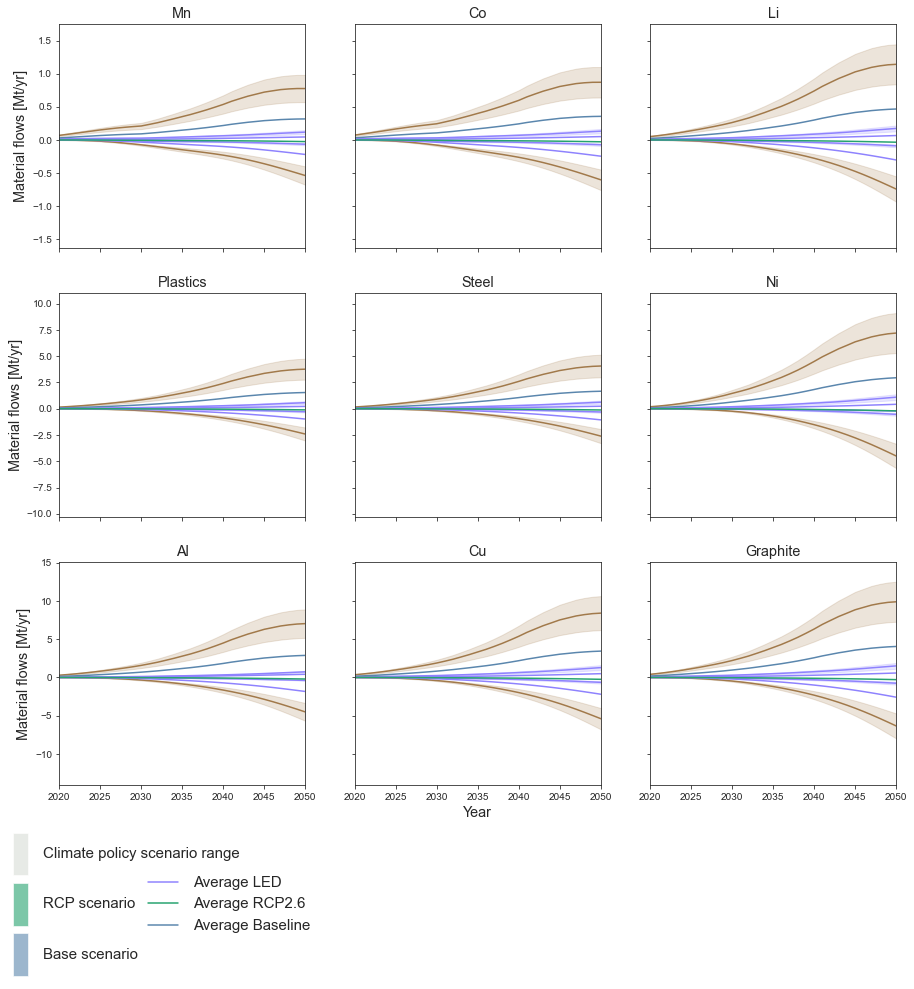

In [91]:
colors = ["#8e82fe","#25a36f","#5a86ad"]

customp = sns.set_palette(sns.color_palette(colors))



fig, ax = plt.subplots(nrows = 3, ncols = 3,figsize=(15,15), sharex = 'col', sharey = 'row')

ax[0,0].set_title('Mn', size = 'x-large')
ax[0,1].set_title('Co', size = 'x-large')
ax[0,2].set_title('Li', size = 'x-large')
ax[0,0].set_xlim(2020,2050)
ax[0,1].set_xlim(2020,2050)
ax[0,2].set_xlim(2020,2050)

#ax[0,0].set_ylim(0,max(material_add_tot_base_SSP2.loc['Li']))
#ax[1,0].set_ylim(0,max(material_add_tot_base_SSP2.loc['Ni']))
#ax[2,0].set_ylim(0,max(material_add_tot_base_SSP2.loc['Graphite']))


ax[1,0].set_title('Plastics', size = 'x-large')
ax[1,2].set_title('Ni', size = 'x-large')
ax[1,1].set_title('Steel', size = 'x-large')
ax[1,0].set_xlim(2020,2050)
ax[1,1].set_xlim(2020,2050)
ax[1,2].set_xlim(2020,2050)

ax[2,0].set_title('Al', size = 'x-large')
ax[2,1].set_title('Cu', size = 'x-large')
ax[2,2].set_title('Graphite', size = 'x-large')
ax[2,0].set_xlim(2020,2050)
ax[2,1].set_xlim(2020,2050)
ax[2,2].set_xlim(2020,2050)

ax[0,0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')
ax[1,0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')
ax[2,0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')

#ax[2,0].set_xlabel('Year', size = 'x-large')
ax[2,1].set_xlabel('Year', size = 'x-large')
#ax[2,2].set_xlabel('Year', size = 'x-large')



## 1
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Mn'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Mn'].divide(1e9)], ax = ax[0,0], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Mn'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Mn'].divide(1e9)], 
                     ax = ax[0,0], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Mn'].divide(1e9), ax = ax[0,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Mn'].divide(1e9), ax = ax[0,0], palette = 'cubehelix', legend = None) 

sns.lineplot(data = [material_out_tot_base_SSP2.loc['Mn'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Mn'].divide(1e9)], ax = ax[0,0], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Mn'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Mn'].divide(1e9)], 
                     ax = ax[0,0], palette = 'cubehelix', legend = None)


sns.lineplot(data = material_out_tot_RCP26_LED.loc['Mn'].divide(1e9), ax = ax[0,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Mn'].divide(1e9), ax = ax[0,0], palette = 'cubehelix', legend = None) 
## 2
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Co'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Co'].divide(1e9)], ax = ax[0,1], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9)], 
                     ax = ax[0,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Co'].divide(1e9), ax = ax[0,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Co'].divide(1e9), ax = ax[0,1], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Co'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Co'].divide(1e9)], ax = ax[0,1], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)], 
                     ax = ax[0,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Co'].divide(1e9), ax = ax[0,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Co'].divide(1e9), ax = ax[0,1], palette = 'cubehelix', legend = None) 


## 3
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Li'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Li'].divide(1e9)], ax = ax[0,2], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9)], 
                     ax = ax[0,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Li'].divide(1e9), ax = ax[0,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Li'].divide(1e9), ax = ax[0,2], palette = 'cubehelix', legend = None) 



sns.lineplot(data = [material_out_tot_base_SSP2.loc['Li'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Li'].divide(1e9)], ax = ax[0,2], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)], 
                     ax = ax[0,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Li'].divide(1e9), ax = ax[0,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Li'].divide(1e9), ax = ax[0,2], palette = 'cubehelix', legend = None) 


## 4
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Plastics'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Plastics'].divide(1e9)], ax = ax[1,0], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Plastics'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Plastics'].divide(1e9)], 
                     ax = ax[1,0], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Plastics'].divide(1e9), ax = ax[1,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Plastics'].divide(1e9), ax = ax[1,0], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Plastics'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Plastics'].divide(1e9)], ax = ax[1,0], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Plastics'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Plastics'].divide(1e9)], 
                     ax = ax[1,0], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Plastics'].divide(1e9), ax = ax[1,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Plastics'].divide(1e9), ax = ax[1,0], palette = 'cubehelix', legend = None) 

## 5
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Ni'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Ni'].divide(1e9)], ax = ax[1,2], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Ni'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Ni'].divide(1e9)], 
                     ax = ax[1,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Ni'].divide(1e9), ax = ax[1,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Ni'].divide(1e9), ax = ax[1,2], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Ni'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Ni'].divide(1e9)], ax = ax[1,2], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Ni'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Ni'].divide(1e9)], 
                     ax = ax[1,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Mn'].divide(1e9), ax = ax[1,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Ni'].divide(1e9), ax = ax[1,2], palette = 'cubehelix', legend = None) 


## 6
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Steel'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Steel'].divide(1e9)], ax = ax[1,1], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Steel'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Steel'].divide(1e9)], 
                    ax = ax[1,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Steel'].divide(1e9), ax = ax[1,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Steel'].divide(1e9), ax = ax[1,1], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Steel'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Steel'].divide(1e9)], ax = ax[1,1], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Steel'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Steel'].divide(1e9)], 
                     ax = ax[1,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Steel'].divide(1e9), ax = ax[1,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Steel'].divide(1e9), ax = ax[1,1], palette = 'cubehelix', legend = None) 

## 7
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Al'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Al'].divide(1e9)], ax = ax[2,0], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Al'].divide(1e9), 
                    material_add_tot_RCP26_SSP1.loc['Al'].divide(1e9)], 
             ax = ax[2,0], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Al'].divide(1e9), ax = ax[2,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Al'].divide(1e9), ax = ax[2,0], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Al'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Al'].divide(1e9)], ax = ax[2,0], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Al'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Al'].divide(1e9)], 
                     ax = ax[2,0], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Al'].divide(1e9), ax = ax[2,0], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Al'].divide(1e9), ax = ax[2,0], palette = 'cubehelix', legend = None) 

## 8
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Cu'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Cu'].divide(1e9)], ax = ax[2,1], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Cu'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Cu'].divide(1e9)], 
                     ax = ax[2,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Cu'].divide(1e9), ax = ax[2,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Cu'].divide(1e9), ax = ax[2,1], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Cu'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Cu'].divide(1e9)], ax = ax[2,1], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Cu'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Cu'].divide(1e9)], 
                     ax = ax[2,1], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Cu'].divide(1e9), ax = ax[2,1], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Cu'].divide(1e9), ax = ax[2,1], palette = 'cubehelix', legend = None) 

## 9
sns.lineplot(data = [material_add_tot_base_SSP2.loc['Graphite'].divide(1e9),
                     material_add_tot_base_SSP1.loc['Graphite'].divide(1e9)], ax = ax[2,2], legend = None)

sns.lineplot(data = [material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9), 
                     material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)], 
                     ax = ax[2,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9), ax = ax[2,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_add_tot_base_LED.loc['Graphite'].divide(1e9), ax = ax[2,2], palette = 'cubehelix', legend = None) 


sns.lineplot(data = [material_out_tot_base_SSP2.loc['Graphite'].divide(1e9),
                     material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)], ax = ax[2,2], legend = None)

sns.lineplot(data = [material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9), 
                     material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)], 
                     ax = ax[2,2], palette = 'cubehelix', legend = None)

sns.lineplot(data = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9), ax = ax[2,2], palette = 'cubehelix', legend = None)
sns.lineplot(data = material_out_tot_base_LED.loc['Graphite'].divide(1e9), ax = ax[2,2], palette = 'cubehelix', legend = None) 

### LEGEND #####



range_1 = mpatches.Patch(color = colors[1], ec=None, alpha=0.6,
                            label='RCP scenario')
range_2 = mpatches.Patch(color = colors[2], ec=None, alpha=0.6,
                            label='Base scenario')

average_values1 =  mlines.Line2D([], [], color = colors[0], label='Average LED')
average_values2 =  mlines.Line2D([], [], color = colors[1], label='Average RCP2.6')
average_values3 =  mlines.Line2D([], [], color = colors[2], label='Average Baseline')

area_between = [range_int,range_1,range_2]
#handles_BEV2 = [baseline_marker]
lines = [average_values1, average_values2, average_values3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
fig.legend(handles=area_between, loc='center left', bbox_to_anchor=(0.0755, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, handlelength=1, handleheight=4, frameon=False)
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center left', bbox_to_anchor=(0.2, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=False)

#plt.savefig('New figures/additions_removals_curves.jpg', dpi = 400)

In [92]:
base_SSP2 = stockadd_BEV_base_SSP2.groupby('material').sum()
base_SSP1 = stockadd_BEV_base_SSP1.groupby('material').sum()
RCP26_SSP2 = stockadd_BEV_RCP26_SSP2.groupby('material').sum()
RCP26_SSP1 = stockadd_BEV_RCP26_SSP1.groupby('material').sum()

base_SSP2 = base_SSP2[[2020,2030,2040,2050]] 
base_SSP1 = base_SSP1[[2020,2030,2040,2050]] 
RCP26_SSP2 = RCP26_SSP2[[2020,2030,2040,2050]] 
RCP26_SSP1 = RCP26_SSP1[[2020,2030,2040,2050]] 

base_eol_SSP2 = matflows_eol_base_SSP2.groupby('material').sum()
base_eol_SSP1 = matflows_eol_base_SSP1.groupby('material').sum()
RCP26_eol_SSP2 = matflows_eol_RCP26_SSP2.groupby('material').sum()
RCP26_eol_SSP1 = matflows_eol_RCP26_SSP1.groupby('material').sum()

base_eol_SSP2 = base_eol_SSP2[[2020,2030,2040,2050]] 
base_eol_SSP1 = base_eol_SSP1[[2020,2030,2040,2050]] 
RCP26_eol_SSP2 = RCP26_eol_SSP2[[2020,2030,2040,2050]] 
RCP26_eol_SSP1 = RCP26_eol_SSP1[[2020,2030,2040,2050]] 


In [93]:
PHEV_base_SSP2 = matadd_PHEV_base_SSP2.groupby('material').sum()
PHEV_base_SSP1 = matadd_PHEV_base_SSP1.groupby('material').sum()
PHEV_RCP26_SSP2 = matadd_PHEV_RCP26_SSP2.groupby('material').sum()
PHEV_RCP26_SSP1 = matadd_PHEV_RCP26_SSP1.groupby('material').sum()

PHEV_base_SSP2 = PHEV_base_SSP2[[2020,2030,2040,2050]] 
PHEV_base_SSP1 = PHEV_base_SSP1[[2020,2030,2040,2050]] 
PHEV_RCP26_SSP2 = PHEV_RCP26_SSP2[[2020,2030,2040,2050]] 
PHEV_RCP26_SSP1 = PHEV_RCP26_SSP1[[2020,2030,2040,2050]] 

PHEV_base_eol_SSP2 = mat_PHEV_eol_base_SSP2.groupby('material').sum()
PHEV_base_eol_SSP1 = mat_PHEV_eol_base_SSP1.groupby('material').sum()
PHEV_RCP26_eol_SSP2 = mat_PHEV_eol_RCP26_SSP2.groupby('material').sum()
PHEV_RCP26_eol_SSP1 = mat_PHEV_eol_RCP26_SSP1.groupby('material').sum()

PHEV_base_eol_SSP2 = PHEV_base_eol_SSP2[[2020,2030,2040,2050]] 
PHEV_base_eol_SSP1 = PHEV_base_eol_SSP1[[2020,2030,2040,2050]] 
PHEV_RCP26_eol_SSP2 = PHEV_RCP26_eol_SSP2[[2020,2030,2040,2050]] 
PHEV_RCP26_eol_SSP1 = PHEV_RCP26_eol_SSP1[[2020,2030,2040,2050]] 


In [94]:
PHEV_base_SSP2 = PHEV_base_SSP2.transpose()
PHEV_base_SSP1 = PHEV_base_SSP1.transpose()
PHEV_RCP26_SSP2 = PHEV_RCP26_SSP2.transpose()
PHEV_RCP26_SSP1 = PHEV_RCP26_SSP1.transpose() 

PHEV_base_eol_SSP2 = PHEV_base_eol_SSP2.transpose() 
PHEV_base_eol_SSP1 = PHEV_base_eol_SSP1.transpose()
PHEV_RCP26_eol_SSP2 = PHEV_RCP26_eol_SSP2.transpose() 
PHEV_RCP26_eol_SSP1 = PHEV_RCP26_eol_SSP1.transpose() 

In [95]:
base_SSP2 = base_SSP2.transpose()
base_SSP1 = base_SSP1.transpose()
RCP26_SSP2 = RCP26_SSP2.transpose()
RCP26_SSP1 = RCP26_SSP1.transpose() 

base_eol_SSP2 = base_eol_SSP2.transpose() 
base_eol_SSP1 = base_eol_SSP1.transpose()
RCP26_eol_SSP2 = RCP26_eol_SSP2.transpose() 
RCP26_eol_SSP1 = RCP26_eol_SSP1.transpose() 



In [96]:
PHEV_new_2020 = pd.DataFrame(data = [PHEV_base_SSP2.loc[2020,:],PHEV_base_SSP1.loc[2020,:],
                                     PHEV_RCP26_SSP2.loc[2020,:],PHEV_RCP26_SSP1.loc[2020,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_2020['Cu'] = PHEV_new_2020['Cu'] +  PHEV_new_2020['Cu_pack']
PHEV_new_2020['Al'] = PHEV_new_2020['Al'] +  PHEV_new_2020['Al_pack']

PHEV_new_2020 = PHEV_new_2020.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_2020 = PHEV_new_2020.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_2020 = PHEV_new_2020.rename_axis(None, axis = 1)

## EOL
PHEV_new_eol_2020 = pd.DataFrame(data = [PHEV_base_eol_SSP2.loc[2020,:],PHEV_base_eol_SSP1.loc[2020,:],
                                    PHEV_RCP26_eol_SSP2.loc[2020,:],PHEV_RCP26_eol_SSP1.loc[2020,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_eol_2020['Cu'] = PHEV_new_eol_2020['Cu'] +  PHEV_new_eol_2020['Cu_pack']
PHEV_new_eol_2020['Al'] = PHEV_new_eol_2020['Al'] +  PHEV_new_eol_2020['Al_pack']

PHEV_new_eol_2020 = PHEV_new_eol_2020.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_eol_2020 = PHEV_new_eol_2020.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_eol_2020 = PHEV_new_eol_2020.rename_axis(None, axis = 1)

PHEV_new_eol_2020 = PHEV_new_eol_2020.multiply(-1)

In [97]:
new_2020 = pd.DataFrame(data = [base_SSP2.loc[2020,:],base_SSP1.loc[2020,:],RCP26_SSP2.loc[2020,:],RCP26_SSP1.loc[2020,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_2020['Cu'] = new_2020['Cu'] +  new_2020['Cu_pack']
new_2020['Al'] = new_2020['Al'] +  new_2020['Al_pack']

new_2020 = new_2020.drop(['Cu_pack','Al_pack'], axis = 1)

#new_2020 = new_2020.sort_values(axis = 1, by = ['Baseline SSP2'])
new_2020 = new_2020.rename_axis(None, axis = 1)

## EOL
new_eol_2020 = pd.DataFrame(data = [base_eol_SSP2.loc[2020,:],base_eol_SSP1.loc[2020,:],
                                    RCP26_eol_SSP2.loc[2020,:],RCP26_eol_SSP1.loc[2020,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_eol_2020['Cu'] = new_eol_2020['Cu'] +  new_eol_2020['Cu_pack']
new_eol_2020['Al'] = new_eol_2020['Al'] +  new_eol_2020['Al_pack']

new_eol_2020 = new_eol_2020.drop(['Cu_pack','Al_pack'], axis = 1)

#new_eol_2020 = new_eol_2020.sort_values(axis = 1, by = ['Baseline SSP2'])
new_eol_2020 = new_eol_2020.rename_axis(None, axis = 1)

new_eol_2020 = new_eol_2020.multiply(-1)

In [98]:
PHEV_new_2030 = pd.DataFrame(data = [PHEV_base_SSP2.loc[2030,:],PHEV_base_SSP1.loc[2030,:],
                                     PHEV_RCP26_SSP2.loc[2030,:],PHEV_RCP26_SSP1.loc[2030,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_2030['Cu'] = PHEV_new_2030['Cu'] +  PHEV_new_2030['Cu_pack']
PHEV_new_2030['Al'] = PHEV_new_2030['Al'] +  PHEV_new_2030['Al_pack']

PHEV_new_2030 = PHEV_new_2030.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_2030 = PHEV_new_2030.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_2030 = PHEV_new_2030.rename_axis(None, axis = 1)


### EOL
PHEV_new_eol_2030 = pd.DataFrame(data = [PHEV_base_eol_SSP2.loc[2030,:],PHEV_base_eol_SSP1.loc[2030,:],
                                    PHEV_RCP26_eol_SSP2.loc[2030,:],PHEV_RCP26_eol_SSP1.loc[2030,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_eol_2030['Cu'] = PHEV_new_eol_2030['Cu'] + PHEV_new_eol_2030['Cu_pack']
PHEV_new_eol_2030['Al'] = PHEV_new_eol_2030['Al'] +  PHEV_new_eol_2030['Al_pack']

PHEV_new_eol_2030 = PHEV_new_eol_2030.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_eol_2030 = PHEV_new_eol_2030.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_eol_2030 = PHEV_new_eol_2030.rename_axis(None, axis = 1)

PHEV_new_eol_2030 = PHEV_new_eol_2030.multiply(-1) 

In [99]:
new_2030 = pd.DataFrame(data = [base_SSP2.loc[2030,:],base_SSP1.loc[2030,:],RCP26_SSP2.loc[2030,:],RCP26_SSP1.loc[2030,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_2030['Cu'] = new_2030['Cu'] +  new_2030['Cu_pack']
new_2030['Al'] = new_2030['Al'] +  new_2030['Al_pack']

new_2030 = new_2030.drop(['Cu_pack','Al_pack'], axis = 1)

#new_2030 = new_2030.sort_values(axis = 1, by = ['Baseline SSP2'])
new_2030 = new_2030.rename_axis(None, axis = 1)


### EOL
new_eol_2030 = pd.DataFrame(data = [base_eol_SSP2.loc[2030,:],base_eol_SSP1.loc[2030,:],
                                    RCP26_eol_SSP2.loc[2030,:],RCP26_eol_SSP1.loc[2030,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_eol_2030['Cu'] = new_eol_2030['Cu'] +  new_eol_2030['Cu_pack']
new_eol_2030['Al'] = new_eol_2030['Al'] +  new_eol_2030['Al_pack']

new_eol_2030 = new_eol_2030.drop(['Cu_pack','Al_pack'], axis = 1)

#new_eol_2030 = new_eol_2030.sort_values(axis = 1, by = ['Baseline SSP2'])
new_eol_2030 = new_eol_2030.rename_axis(None, axis = 1)

new_eol_2030 = new_eol_2030.multiply(-1) 

In [100]:
PHEV_new_2040 = pd.DataFrame(data = [PHEV_base_SSP2.loc[2040,:],PHEV_base_SSP1.loc[2040,:],
                                     PHEV_RCP26_SSP2.loc[2040,:],PHEV_RCP26_SSP1.loc[2040,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_2040['Cu'] = PHEV_new_2040['Cu'] +  PHEV_new_2040['Cu_pack']
PHEV_new_2040['Al'] = PHEV_new_2040['Al'] +  PHEV_new_2040['Al_pack']

PHEV_new_2040 = PHEV_new_2040.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_2040 = PHEV_new_2040.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_2040 = PHEV_new_2040.rename_axis(None, axis = 1)

### EOL
PHEV_new_eol_2040 = pd.DataFrame(data = [PHEV_base_eol_SSP2.loc[2040,:],PHEV_base_eol_SSP1.loc[2040,:],
                                    PHEV_RCP26_eol_SSP2.loc[2040,:],PHEV_RCP26_eol_SSP1.loc[2040,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_eol_2040['Cu'] = PHEV_new_eol_2040['Cu'] +  PHEV_new_eol_2040['Cu_pack']
PHEV_new_eol_2040['Al'] = PHEV_new_eol_2040['Al'] +  PHEV_new_eol_2040['Al_pack']

PHEV_new_eol_2040 = PHEV_new_eol_2040.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_eol_2040 = PHEV_new_eol_2040.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_eol_2040 = PHEV_new_eol_2040.rename_axis(None, axis = 1)

PHEV_new_eol_2040 = PHEV_new_eol_2040.multiply(-1)

In [101]:
new_2040 = pd.DataFrame(data = [base_SSP2.loc[2040,:],base_SSP1.loc[2040,:],RCP26_SSP2.loc[2040,:],RCP26_SSP1.loc[2040,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_2040['Cu'] = new_2040['Cu'] +  new_2040['Cu_pack']
new_2040['Al'] = new_2040['Al'] +  new_2040['Al_pack']

new_2040 = new_2040.drop(['Cu_pack','Al_pack'], axis = 1)

#new_2040 = new_2040.sort_values(axis = 1, by = ['Baseline SSP2'])
new_2040 = new_2040.rename_axis(None, axis = 1)

### EOL
new_eol_2040 = pd.DataFrame(data = [base_eol_SSP2.loc[2040,:],base_eol_SSP1.loc[2040,:],
                                    RCP26_eol_SSP2.loc[2040,:],RCP26_eol_SSP1.loc[2040,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_eol_2040['Cu'] = new_eol_2040['Cu'] +  new_eol_2040['Cu_pack']
new_eol_2040['Al'] = new_eol_2040['Al'] +  new_eol_2040['Al_pack']

new_eol_2040 = new_eol_2040.drop(['Cu_pack','Al_pack'], axis = 1)

#new_eol_2040 = new_eol_2040.sort_values(axis = 1, by = ['Baseline SSP2'])
new_eol_2040 = new_eol_2040.rename_axis(None, axis = 1)

new_eol_2040 = new_eol_2040.multiply(-1)

In [102]:
PHEV_new_2050 = pd.DataFrame(data = [PHEV_base_SSP2.loc[2050,:],PHEV_base_SSP1.loc[2050,:],
                                     PHEV_RCP26_SSP2.loc[2050,:],PHEV_RCP26_SSP1.loc[2050,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_2050['Cu'] = PHEV_new_2050['Cu'] +  PHEV_new_2050['Cu_pack']
PHEV_new_2050['Al'] = PHEV_new_2050['Al'] +  PHEV_new_2050['Al_pack']

PHEV_new_2050 = PHEV_new_2050.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_2050 = PHEV_new_2050.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_2050 = PHEV_new_2050.rename_axis(None, axis = 1)

### EOL

PHEV_new_eol_2050 = pd.DataFrame(data = [PHEV_base_eol_SSP2.loc[2050,:],PHEV_base_eol_SSP1.loc[2050,:],
                                   PHEV_RCP26_eol_SSP2.loc[2050,:],PHEV_RCP26_eol_SSP1.loc[2050,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

PHEV_new_eol_2050['Cu'] = PHEV_new_eol_2050['Cu'] +  PHEV_new_eol_2050['Cu_pack']
PHEV_new_eol_2050['Al'] = PHEV_new_eol_2050['Al'] +  PHEV_new_eol_2050['Al_pack']

PHEV_new_eol_2050 = PHEV_new_eol_2050.drop(['Cu_pack','Al_pack'], axis = 1)

#PHEV_new_eol_2050 = PHEV_new_eol_2050.sort_values(axis = 1, by = ['Baseline SSP2'])
PHEV_new_eol_2050 = PHEV_new_eol_2050.rename_axis(None, axis = 1)

PHEV_new_eol_2050 = PHEV_new_eol_2050.multiply(-1)

In [103]:
new_2050 = pd.DataFrame(data = [base_SSP2.loc[2050,:],base_SSP1.loc[2050,:],RCP26_SSP2.loc[2050,:],RCP26_SSP1.loc[2050,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_2050['Cu'] = new_2050['Cu'] +  new_2050['Cu_pack']
new_2050['Al'] = new_2050['Al'] +  new_2050['Al_pack']

new_2050 = new_2050.drop(['Cu_pack','Al_pack'], axis = 1)

#new_2050 = new_2050.sort_values(axis = 1, by = ['Baseline SSP2'])
new_2050 = new_2050.rename_axis(None, axis = 1)

### EOL

new_eol_2050 = pd.DataFrame(data = [base_eol_SSP2.loc[2050,:],base_eol_SSP1.loc[2050,:],
                                    RCP26_eol_SSP2.loc[2050,:],RCP26_eol_SSP1.loc[2050,:]], 
                        index = ['Baseline SSP2','Baseline SSP1', 'RCP2.6 SSP2', 'RCP2.6 SSP1' ])

new_eol_2050['Cu'] = new_eol_2050['Cu'] +  new_eol_2050['Cu_pack']
new_eol_2050['Al'] = new_eol_2050['Al'] +  new_eol_2050['Al_pack']

new_eol_2050 = new_eol_2050.drop(['Cu_pack','Al_pack'], axis = 1)

#new_eol_2050 = new_eol_2050.sort_values(axis = 1, by = ['Baseline SSP2'])
new_eol_2050 = new_eol_2050.rename_axis(None, axis = 1)

new_eol_2050 = new_eol_2050.multiply(-1)

## Making other figures

In [104]:
cap_base_SSP2 = addcap_base_SSP2.groupby('segment').sum().sum(axis = 0)

cap_base_SSP1 = addcap_base_SSP1.groupby('segment').sum().sum(axis = 0)

cap_RCP26_SSP2 = addcap_RCP26_SSP2.groupby('segment').sum().sum(axis = 0)

cap_RCP26_SSP1 = addcap_RCP26_SSP1.groupby('segment').sum().sum(axis = 0)


In [105]:
addcap_total_base_SSP2 = addcap_base_SSP2 + addcap_PHEV_base_SSP2
addcap_total_base_SSP1 = addcap_base_SSP1 + addcap_PHEV_base_SSP1
addcap_total_RCP26_SSP2 = addcap_RCP26_SSP2 + addcap_PHEV_RCP26_SSP2
addcap_total_RCP26_SSP1 = addcap_RCP26_SSP1 + addcap_PHEV_RCP26_SSP1


In [106]:
boh = addcap_total_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0).to_list()
boh2 = addcap_total_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0).to_list()

In [107]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [108]:
ratio2030to2020 = new_2030.divide(new_2020)
ratio2040to2020 = new_2040.divide(new_2020)
ratio2050to2020 = new_2050.divide(new_2020)

In [109]:
ratio2030to2020 = (new_2030 + PHEV_new_2030).divide((new_2020 + PHEV_new_2020))
ratio2040to2020 = (PHEV_new_2040 + new_2040).divide((new_2020 + PHEV_new_2020))
ratio2050to2020 = (PHEV_new_2050 + new_2050).divide(new_2020 + PHEV_new_2020)
#ratio2020to2020 = new_2020.divide(new_2020)

In [110]:
ratio2030to2020_short = ratio2030to2020.drop(['Steel','Plastics'], axis = 1)
ratio2040to2020_short = ratio2040to2020.drop(['Steel','Plastics'], axis = 1)
ratio2050to2020_short = ratio2050to2020.drop(['Steel','Plastics'], axis = 1)

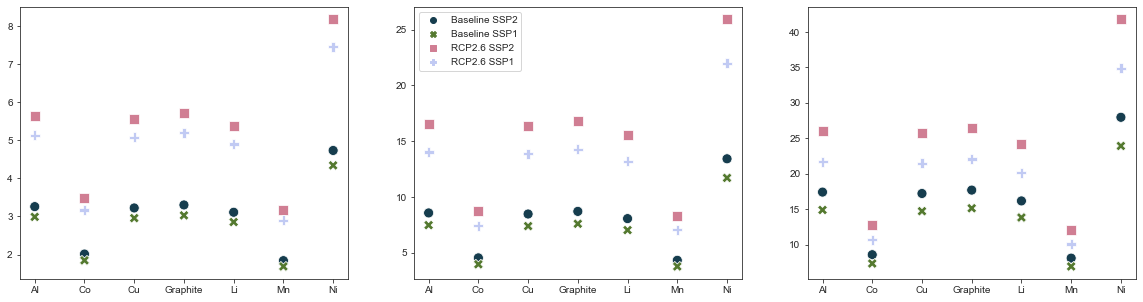

In [111]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,5))#, sharey = 'row')

sns.scatterplot(data = ratio2030to2020_short.transpose(), palette = 'cubehelix', ax = ax[0], s = 100)
ax[0].legend_ = None
sns.scatterplot(data = ratio2040to2020_short.transpose(), palette = 'cubehelix', ax = ax[1], s = 100)
sns.scatterplot(data = ratio2050to2020_short.transpose(), palette = 'cubehelix', ax = ax[2], s = 100)
ax[2].legend_ = None

In [112]:
ratio2030to2020_o = ratio2030to2020[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
ratio2040to2020_o = ratio2040to2020[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
ratio2050to2020_o = ratio2050to2020[['Mn','Co','Li','Ni','Al','Cu','Graphite']]


In [113]:
matstock_base_SSP2_agg = stockadd_BEV_base_SSP2.divide(1e9).groupby('material').sum()

matstock_base_SSP1_agg = stockadd_BEV_base_SSP1.divide(1e9).groupby('material').sum()

matstock_RCP26_SSP2_agg = stockadd_BEV_RCP26_SSP2.divide(1e9).groupby('material').sum()

matstock_RCP26_SSP1_agg = stockadd_BEV_RCP26_SSP1.divide(1e9).groupby('material').sum()




In [114]:
matstock_base_SSP2_agg.loc['Al'] += matstock_base_SSP2_agg.loc['Al_pack'] 
matstock_base_SSP2_agg.loc['Cu'] += matstock_base_SSP2_agg.loc['Cu_pack'] 
matstock_base_SSP2_agg = matstock_base_SSP2_agg.drop(['Cu_pack','Al_pack'], axis = 0)

matstock_base_SSP1_agg.loc['Al'] += matstock_base_SSP1_agg.loc['Al_pack'] 
matstock_base_SSP1_agg.loc['Cu'] += matstock_base_SSP1_agg.loc['Cu_pack'] 
matstock_base_SSP1_agg = matstock_base_SSP1_agg.drop(['Cu_pack','Al_pack'], axis = 0)


matstock_RCP26_SSP2_agg.loc['Al'] += matstock_RCP26_SSP2_agg.loc['Al_pack'] 
matstock_RCP26_SSP2_agg.loc['Cu'] += matstock_RCP26_SSP2_agg.loc['Cu_pack'] 
matstock_RCP26_SSP2_agg = matstock_RCP26_SSP2_agg.drop(['Cu_pack','Al_pack'], axis = 0)


matstock_RCP26_SSP1_agg.loc['Al'] += matstock_RCP26_SSP1_agg.loc['Al_pack'] 
matstock_RCP26_SSP1_agg.loc['Cu'] += matstock_RCP26_SSP1_agg.loc['Cu_pack']
matstock_RCP26_SSP1_agg = matstock_RCP26_SSP1_agg.drop(['Cu_pack','Al_pack'], axis = 0)



## Similar charts but also with PHEVs

In [115]:
tot_2020 = new_2020 + PHEV_new_2020
tot_eol_2020 = new_eol_2020 + PHEV_new_eol_2020

tot_2030 = new_2030 + PHEV_new_2030
tot_eol_2030 = new_eol_2030 + PHEV_new_eol_2030

tot_2040 = new_2040 + PHEV_new_2040
tot_eol_2040 = new_eol_2040 + PHEV_new_eol_2040

tot_2050 = new_2050 + PHEV_new_2050
tot_eol_2050 = new_eol_2050 + PHEV_new_eol_2050

In [116]:
tot_2020.sort_values(by=['Co'])

,Al,Co,Cu,Graphite,Li,Mn,Ni,Plastics,Steel
Baseline SSP1,5.383207e+07,1.351264e+07,6.504714e+07,7.447527e+07,9.408619e+06,1.276027e+07,3.433184e+07,2.810746e+07,3.034793e+07
Baseline SSP2,7.709806e+07,1.935275e+07,9.316023e+07,1.066632e+08,1.347498e+07,1.827521e+07,4.916991e+07,4.025539e+07,4.346417e+07
RCP2.6 SSP1,2.382635e+08,5.980763e+07,2.879019e+08,3.296313e+08,4.164302e+07,5.647763e+07,1.519545e+08,1.244051e+08,1.343215e+08
RCP2.6 SSP2,3.418372e+08,8.580616e+07,4.130536e+08,4.729229e+08,5.974535e+07,8.102859e+07,2.180094e+08,1.784842e+08,1.927113e+08


In [117]:
tot2020_o = tot_2020[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
tot2030_o = tot_2030[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
tot2040_o = tot_2040[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
tot2050_o = tot_2050[['Mn','Co','Li','Ni','Al','Cu','Graphite']]

In [118]:
toteol2020_o = new_eol_2020[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
toteol2030_o = tot_eol_2030[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
toteol2040_o = tot_eol_2040[['Mn','Co','Li','Ni','Al','Cu','Graphite']]
toteol2050_o = tot_eol_2050[['Mn','Co','Li','Ni','Al','Cu','Graphite']]

In [119]:
PHEV_matstock_base_SSP2_agg = matadd_PHEV_base_SSP2.divide(1e9).groupby('material').sum()

PHEV_matstock_base_SSP1_agg = matadd_PHEV_base_SSP1.divide(1e9).groupby('material').sum()

PHEV_matstock_RCP26_SSP2_agg = matadd_PHEV_RCP26_SSP2.divide(1e9).groupby('material').sum()

PHEV_matstock_RCP26_SSP1_agg = matadd_PHEV_RCP26_SSP1.divide(1e9).groupby('material').sum()


In [120]:
PHEV_matstock_base_SSP2_agg.loc['Al'] += PHEV_matstock_base_SSP2_agg.loc['Al_pack'] 
PHEV_matstock_base_SSP2_agg.loc['Cu'] += PHEV_matstock_base_SSP2_agg.loc['Cu_pack'] 
PHEV_matstock_base_SSP2_agg = PHEV_matstock_base_SSP2_agg.drop(['Cu_pack','Al_pack'], axis = 0)

PHEV_matstock_base_SSP1_agg.loc['Al'] += PHEV_matstock_base_SSP1_agg.loc['Al_pack'] 
PHEV_matstock_base_SSP1_agg.loc['Cu'] += PHEV_matstock_base_SSP1_agg.loc['Cu_pack'] 
PHEV_matstock_base_SSP1_agg = PHEV_matstock_base_SSP1_agg.drop(['Cu_pack','Al_pack'], axis = 0)


PHEV_matstock_RCP26_SSP2_agg.loc['Al'] += PHEV_matstock_RCP26_SSP2_agg.loc['Al_pack'] 
PHEV_matstock_RCP26_SSP2_agg.loc['Cu'] += PHEV_matstock_RCP26_SSP2_agg.loc['Cu_pack'] 
PHEV_matstock_RCP26_SSP2_agg = PHEV_matstock_RCP26_SSP2_agg.drop(['Cu_pack','Al_pack'], axis = 0)


PHEV_matstock_RCP26_SSP1_agg.loc['Al'] += PHEV_matstock_RCP26_SSP1_agg.loc['Al_pack'] 
PHEV_matstock_RCP26_SSP1_agg.loc['Cu'] += PHEV_matstock_RCP26_SSP1_agg.loc['Cu_pack']
PHEV_matstock_RCP26_SSP1_agg = PHEV_matstock_RCP26_SSP1_agg.drop(['Cu_pack','Al_pack'], axis = 0)


In [121]:
tot_matstock_base_SSP2_agg = PHEV_matstock_base_SSP2_agg + matstock_base_SSP2_agg
tot_matstock_base_SSP1_agg = PHEV_matstock_base_SSP1_agg + matstock_base_SSP1_agg
tot_matstock_RCP26_SSP2_agg = PHEV_matstock_RCP26_SSP2_agg + matstock_RCP26_SSP2_agg
tot_matstock_RCP26_SSP1_agg = PHEV_matstock_RCP26_SSP1_agg + matstock_RCP26_SSP1_agg

## Export results as pickle files for future access

tot_2020.to_pickle('Material_inflows2020_all.pkl')
tot_2030.to_pickle('Material_inflows2030_all.pkl')
tot_2040.to_pickle('Material_inflows2040_all.pkl')
tot_2050.to_pickle('Material_inflows2050_all.pkl')

tot_eol_2020.to_pickle('Material_outlows2020_all.pkl')
tot_eol_2030.to_pickle('Material_outflows2030_all.pkl')
tot_eol_2040.to_pickle('Material_outflows2040_all.pkl')
tot_eol_2050.to_pickle('Material_outflows2050_all.pkl')

addcap_total_base_SSP2.to_pickle('TotCapacity_additions_baseSSP2.pkl')
addcap_total_base_SSP1.to_pickle('TotCapacity_additions_baseSSP1.pkl')
addcap_total_RCP26_SSP2.to_pickle('TotCapacity_additions_RCP26SSP2.pkl')
addcap_total_RCP26_SSP1.to_pickle('TotCapacity_additions_RCP26SSP1.pkl')

cap_total_eol_base_SSP2.to_pickle('TotCapacity_eol_baseSSP2.pkl')
cap_total_eol_base_SSP1.to_pickle('TotCapacity_eol_baseSSP1.pkl')
cap_total_eol_RCP26_SSP2.to_pickle('TotCapacity_eol_RCP26SSP2.pkl')
cap_total_eol_RCP26_SSP1.to_pickle('TotCapacity_eol_RCP26SSP1.pkl')


In [122]:
matadd_base_SSP2 = stockadd_BEV_base_SSP2 + matadd_PHEV_base_SSP2
matadd_base_SSP1 = stockadd_BEV_base_SSP1 + matadd_PHEV_base_SSP1
matadd_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2 + matadd_PHEV_RCP26_SSP2
matadd_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1 + matadd_PHEV_RCP26_SSP1

mateol_base_SSP2 = matflows_eol_base_SSP2 + mat_PHEV_eol_base_SSP2
mateol_base_SSP1 = matflows_eol_base_SSP1 + mat_PHEV_eol_base_SSP1
mateol_RCP26_SSP2 = matflows_eol_RCP26_SSP2 + mat_PHEV_eol_RCP26_SSP2
mateol_RCP26_SSP1 = matflows_eol_RCP26_SSP1 + mat_PHEV_eol_RCP26_SSP1


In [123]:
matadd_base_SSP2 = stockadd_BEV_base_SSP2 + matadd_PHEV_base_SSP2
matadd_base_SSP1 = stockadd_BEV_base_SSP1 + matadd_PHEV_base_SSP1
matadd_RCP26_SSP2 = stockadd_BEV_RCP26_SSP2 + matadd_PHEV_RCP26_SSP2
matadd_RCP26_SSP1 = stockadd_BEV_RCP26_SSP1 + matadd_PHEV_RCP26_SSP1

mateol_base_SSP2 = matflows_eol_base_SSP2 + mat_PHEV_eol_base_SSP2
mateol_base_SSP1 = matflows_eol_base_SSP1 + mat_PHEV_eol_base_SSP1
mateol_RCP26_SSP2 = matflows_eol_RCP26_SSP2 + mat_PHEV_eol_RCP26_SSP2
mateol_RCP26_SSP1 = matflows_eol_RCP26_SSP1 + mat_PHEV_eol_RCP26_SSP1


matadd_base_SSP2.to_pickle('Material_additions_baseSSP2.pkl')
matadd_base_SSP1.to_pickle('Material_additions_baseSSP1.pkl')
matadd_RCP26_SSP2.to_pickle('Material_additions_RCP26SSP2.pkl')
matadd_RCP26_SSP1.to_pickle('Material_additions_RCP26SSP1.pkl')

mateol_base_SSP2.to_pickle('Material_eol_baseSSP2.pkl')
mateol_base_SSP1.to_pickle('Material_eol_baseSSP1.pkl')
mateol_RCP26_SSP2.to_pickle('Material_eol_RCP26SSP2.pkl')
mateol_RCP26_SSP1.to_pickle('Material_eol_RCP26SSP1.pkl')



In [124]:
prod_capacity = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Production capacity', skiprows = 39, nrows = 4, usecols = 'C:R')


In [125]:
industry_growth = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 66, nrows = 9, usecols = 'B:BT')

In [126]:
industry_growth = industry_growth.set_index('Material')

In [127]:
industry_growth

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Material,,,,,,,,,,,,,,,,,,,,,
Cement,0.017857,0.021133,0.025123,0.028325,0.032759,0.036700,0.039655,0.043842,0.048005,0.053522,...,0.645320,0.692118,0.701970,0.751232,0.810345,0.894089,0.940887,1.002463,1.029557,1.0
Primary aluminium,0.013739,0.018783,0.022087,0.022783,0.025913,0.031304,0.035826,0.042957,0.048870,0.054609,...,0.589565,0.659130,0.690435,0.646957,0.726957,0.813913,0.855652,0.902609,0.939130,1.0
Baseline SSP2,0.111984,0.126714,0.131599,0.141024,0.145795,0.156315,0.154316,0.169156,0.176458,0.190307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baseline SSP1,0.141153,0.158270,0.162148,0.171907,0.175462,0.186185,0.180584,0.196108,0.201710,0.215132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCP2.6 SSP2,0.147077,0.178594,0.200715,0.228659,0.251203,0.282306,0.293168,0.322948,0.339591,0.368882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCP2.6 SSP1,0.175821,0.210964,0.233842,0.263199,0.285404,0.317070,0.324121,0.352867,0.365703,0.392530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.


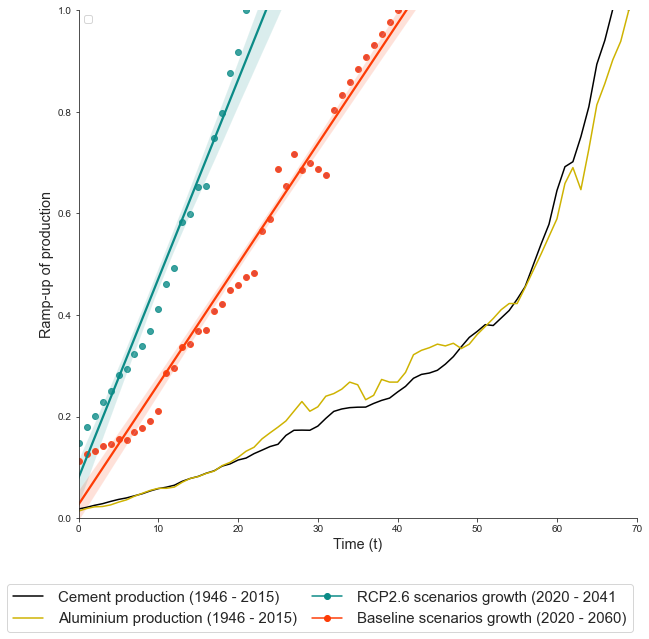

In [128]:
fig, ax = plt.subplots(figsize=(10,10))

colors = ['#0b8b87','#fd3c06','#000000','#ceb301']
customp = sns.set_palette(sns.color_palette(colors))

x = industry_growth.columns.values
y1 = industry_growth.loc['Cement']
y2 = industry_growth.loc['Primary aluminium']

ax.plot(x, y1, color = colors[2])
sns.lineplot(x, y2, color = colors[3])

sns.scatterplot(data = industry_growth.loc['Baseline SSP2'])

y1 = industry_growth.loc['RCP2.6 SSP2']
y2 = industry_growth.loc['Baseline SSP2']

x = industry_growth.columns.values
x = np.array(x, dtype=float)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.regplot(x,y1, color = colors[0])
sns.regplot(x,y2, color = colors[1])
        #data = industry_growth.loc['RCP2.6 SSP2'])

plt.legend()

#ax.legend(['Cement (1946-2015)','Aluminium (1946-2015)','Batteries baseline SSP2 (2015-2050)','Batteries RCP2.6 SSP2 (2015-2050)'], loc = 1, fontsize='large')

ax.set_ylabel('Ramp-up of production', size = 'x-large')
ax.set_xlabel('Time (t)', size = 'x-large')

ax.set_ylim(0,1)
ax.set_xlim(0,70)

### LEGEND #####

line1 =  mlines.Line2D([], [], color = colors[2], label='Cement production (1946 - 2015)')
line2 =  mlines.Line2D([], [], color = colors[3], label='Aluminium production (1946 - 2015)')
scat1 =  mlines.Line2D([], [], color = colors[0], marker = '.', label='RCP2.6 scenarios growth (2020 - 2041')
scat2 =  mlines.Line2D([], [], color = colors[1], marker = '.', label='Baseline scenarios growth (2020 - 2060)')



#handles_BEV2 = [baseline_marker]
lines = [line1, line2, scat1, scat2]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.46, 0.05),
               borderaxespad=0.1, handletextpad=1., columnspacing=1,
               fontsize=15, frameon=True, ncol= 2, markerscale = 2)


#plt.savefig('Battery production vs cement and aluminium.jpg', dpi  = 1200, bbox_inches = 'tight')
#plt.savefig('New figures/Battery production vs cement and aluminium_lowres.jpg', dpi  = 600, bbox_inches = 'tight')

In [129]:
tmp_base_SSP2 = mateol_base_SSP2.divide(1e9).groupby('material').sum()
tmp_base_SSP1 = mateol_base_SSP1.divide(1e9).groupby('material').sum()
tmp_RCP26_SSP2 = mateol_RCP26_SSP2.divide(1e9).groupby('material').sum()
tmp_RCP26_SSP1 = mateol_RCP26_SSP1.divide(1e9).groupby('material').sum()

tmp_base_SSP2.loc['Al'] += tmp_base_SSP2.loc['Al_pack'] 
tmp_base_SSP2.loc['Cu'] += tmp_base_SSP2.loc['Cu_pack'] 
tmp_base_SSP2 = tmp_base_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)

tmp_base_SSP1.loc['Al'] += tmp_base_SSP1.loc['Al_pack'] 
tmp_base_SSP1.loc['Cu'] += tmp_base_SSP1.loc['Cu_pack'] 
tmp_base_SSP1 = tmp_base_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)


tmp_RCP26_SSP2.loc['Al'] += tmp_RCP26_SSP2.loc['Al_pack'] 
tmp_RCP26_SSP2.loc['Cu'] += tmp_RCP26_SSP2.loc['Cu_pack'] 
tmp_RCP26_SSP2 = tmp_RCP26_SSP2.drop(['Cu_pack','Al_pack'], axis = 0)


tmp_RCP26_SSP1.loc['Al'] += tmp_RCP26_SSP1.loc['Al_pack'] 
tmp_RCP26_SSP1.loc['Cu'] += tmp_RCP26_SSP1.loc['Cu_pack']
tmp_RCP26_SSP1 = tmp_RCP26_SSP1.drop(['Cu_pack','Al_pack'], axis = 0)

In [130]:
stock_base_SSP2 = tot_matstock_base_SSP2_agg.cumsum() - tmp_base_SSP2.cumsum()

stock_base_SSP1 = tot_matstock_base_SSP1_agg.cumsum() - tmp_base_SSP1.cumsum()

stock_RCP26_SSP2 = tot_matstock_RCP26_SSP2_agg.cumsum() - tmp_RCP26_SSP2.cumsum()

stock_RCP26_SSP1 = tot_matstock_RCP26_SSP1_agg.cumsum() - tmp_RCP26_SSP1.cumsum()

In [131]:
stock_RCP26_SSP1 = stock_RCP26_SSP1.loc[:,2015:2050]
stock_RCP26_SSP2 = stock_RCP26_SSP2.loc[:,2015:2050]
stock_base_SSP1 = stock_base_SSP1.loc[:,2015:2050]
stock_base_SSP1 = stock_base_SSP2.loc[:,2015:2050]

## Define jobs generated per GWh

In [132]:
employees = 200

## Above 

In [133]:
employee_base_SSP2 = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff().mul(employees)
employee_base_SSP1 = addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff().mul(employees)
employee_RCP26_SSP2 = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff().mul(employees)
employee_RCP26_SSP1 = addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff().mul(employees)

#employee_RCP26_SSP2 = employee_RCP26_SSP2[2:32] 
#employee_RCP26_SSP1 = employee_RCP26_SSP1[2:32] 

## Not necessary to slice baseline, as numbers keep increasing.
#employee_base_SSP2 = employee_base_SSP2[2:32] 
#employee_base_SSP1 = employee_base_SSP1[2:32] 

In [134]:
cumulative_employee_RCP26_SSP2 = np.cumsum(employee_RCP26_SSP2) 
cumulative_employee_RCP26_SSP1 = np.cumsum(employee_RCP26_SSP1)
cumulative_employee_base_SSP2 = np.cumsum(employee_base_SSP2) 
cumulative_employee_base_SSP1 = np.cumsum(employee_base_SSP1) 

In [135]:


employee_RCP26_LED = addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff().mul(employees)
#employee_RCP26_LED = employee_RCP26_LED[2:31] 

In [136]:
new_emp = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Employment and automation', 
                        skiprows = 1, nrows = 1, usecols = 'B:AO')

high_loss = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Employment and automation',
                        skiprows = 17, nrows = 1, usecols = 'B:AO')

low_loss = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Employment and automation', 
                         skiprows = 22, nrows = 1, usecols = 'B:AO')

In [137]:
high_loss = high_loss.interpolate(method = 'linear', axis = 1)
low_loss = low_loss.interpolate(method = 'linear', axis = 1)

In [138]:
high_emp_loss = high_loss.mul(new_emp)
low_emp_loss = low_loss.mul(new_emp)

In [139]:
bas_SSP2_emp = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()
bas_SSP1_emp = addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()
RCP26_SSP2_emp = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()
RCP26_SSP1_emp = addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()
RCP26_LED_emp = addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()
base_LED_emp = addcap_base_LED.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff()


In [140]:
lowemp_base_SSP2 = low_emp_loss.mul(bas_SSP2_emp)
lowemp_base_SSP1 = low_emp_loss.mul(bas_SSP1_emp)
lowemp_RCP26_SSP2 = low_emp_loss.mul(RCP26_SSP2_emp)
lowemp_RCP26_SSP1 = low_emp_loss.mul(RCP26_SSP1_emp)
lowemp_RCP26_LED = low_emp_loss.mul(RCP26_LED_emp)
lowemp_base_LED = low_emp_loss.mul(base_LED_emp)

highemp_base_SSP2 = high_emp_loss.mul(bas_SSP2_emp)
highemp_base_SSP1 = high_emp_loss.mul(bas_SSP1_emp)
highemp_RCP26_SSP2 = high_emp_loss.mul(RCP26_SSP2_emp)
highemp_RCP26_SSP1 = high_emp_loss.mul(RCP26_SSP1_emp)
highemp_RCP26_LED = high_emp_loss.mul(RCP26_LED_emp)
highemp_base_LED = high_emp_loss.mul(base_LED_emp)


In [141]:
lowemp_base_SSP2 = lowemp_base_SSP2.loc[:,2020:2050]
lowemp_base_SSP1 = lowemp_base_SSP1.loc[:,2020:2050]
lowemp_RCP26_SSP2 = lowemp_RCP26_SSP2.loc[:,2020:2050]
lowemp_RCP26_SSP1 = lowemp_RCP26_SSP1.loc[:,2020:2050]
lowemp_RCP26_LED = lowemp_RCP26_LED.loc[:,2020:2050]
lowemp_base_LED = lowemp_base_LED.loc[:,2020:2050]

highemp_base_SSP2 = highemp_base_SSP2.loc[:,2020:2050]
highemp_base_SSP1 = highemp_base_SSP1.loc[:,2020:2050]
highemp_RCP26_SSP2 = highemp_RCP26_SSP2.loc[:,2020:2050]
highemp_RCP26_SSP1 = highemp_RCP26_SSP1.loc[:,2020:2050]
highemp_RCP26_LED = highemp_RCP26_LED.loc[:,2020:2050]
highemp_base_LED = highemp_base_LED.loc[:,2020:2050]

In [142]:
cum_lowemp_base_SSP2 = lowemp_base_SSP2.cumsum(axis = 1)
cum_lowemp_base_SSP1 = lowemp_base_SSP1.cumsum(axis = 1)
cum_lowemp_RCP26_SSP2 = lowemp_RCP26_SSP2.cumsum(axis = 1)
cum_lowemp_RCP26_SSP1 = lowemp_RCP26_SSP1.cumsum(axis = 1)
cum_lowemp_RCP26_LED = lowemp_RCP26_LED.cumsum(axis = 1)
cum_lowemp_base_LED = lowemp_base_LED.cumsum(axis = 1)

cum_highemp_base_SSP2 = highemp_base_SSP2.cumsum(axis = 1)
cum_highemp_base_SSP1 = highemp_base_SSP1.cumsum(axis = 1)
cum_highemp_RCP26_SSP2 = highemp_RCP26_SSP2.cumsum(axis = 1)
cum_highemp_RCP26_SSP1 = highemp_RCP26_SSP1.cumsum(axis = 1)
cum_highemp_RCP26_LED = highemp_RCP26_LED.cumsum(axis = 1)
cum_highemp_base_LED = highemp_base_LED.cumsum(axis = 1)

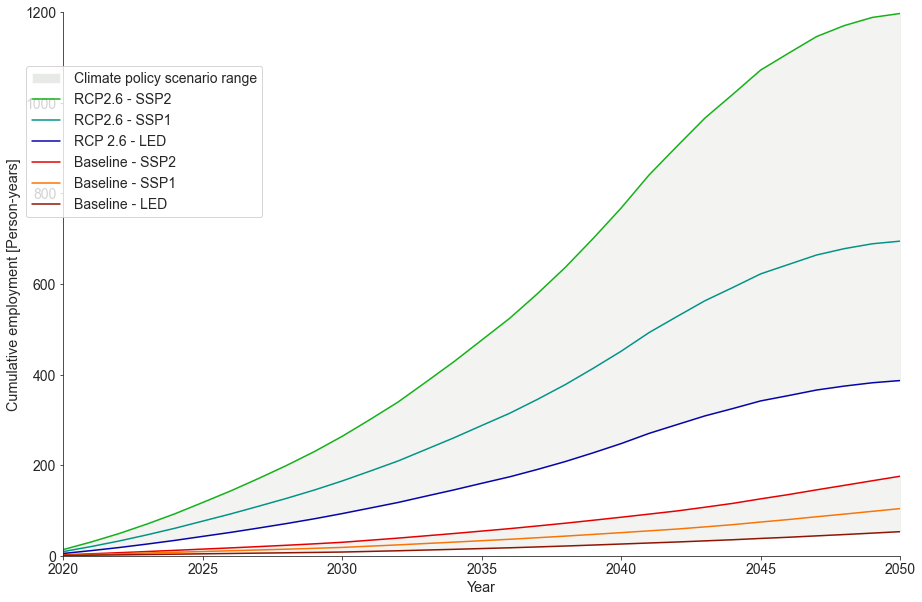

In [143]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(figsize = (15,10))
#ax.set_title('Cumulative jobs generated', size = 'x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative employment [Person-years]', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')
x = cum_highemp_base_LED.columns.values
x = np.array(x, dtype = 'float')
y1 = cum_lowemp_RCP26_SSP2.div(1e3).sum(axis = 0)
y2 = cum_lowemp_RCP26_SSP1.div(1e3).sum(axis = 0)
y3 = cum_lowemp_RCP26_LED.div(1e3).sum(axis = 0)
y4 = cum_lowemp_base_SSP2.div(1e3).sum(axis = 0)
y5 = cum_lowemp_base_SSP1.div(1e3).sum(axis = 0)
y6 = cum_lowemp_base_LED.div(1e3).sum(axis = 0)

##Cumulative employment
ax.plot(x,y1,color = linecols[2]) 
ax.plot(x,y2, color = linecols[3])
ax.plot(x,y3,color = linecols[5])

ax.plot(x,y4, color = linecols[0]) 
ax.plot(x,y5, color = linecols[1])
ax.plot(x,y6, color = linecols[4])

plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

ax.legend_= None
line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for l|egend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.2, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=14, frameon=True, ncol= 1)

ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
ax.fill_between(x, y1,y3, color = col_background, alpha = .3)
ax.set_ylim(0,1200)
#ax[0].set_ylim(0,50)
#ax[1].set_ylim(0,800)
#plt.subplots_adjust(wspace = 0.4)
#plt.tight_layout()
plt.savefig('jobs_new_lowauto.jpg', dpi = 400, bbox_inches = 'tight')

(0.0, 1200.0)

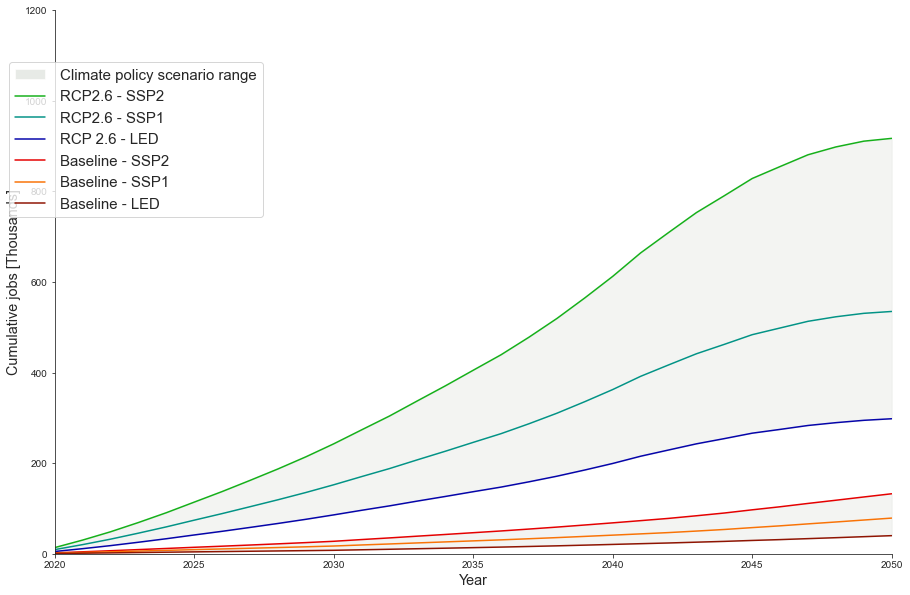

In [144]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(figsize = (15,10))
#ax.set_title('Cumulative jobs generated', size = 'x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative jobs [Thousands]', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')
x = cum_highemp_base_LED.columns.values
x = np.array(x, dtype = 'float')
y1 = cum_highemp_RCP26_SSP2.div(1e3).sum(axis = 0)
y2 = cum_highemp_RCP26_SSP1.div(1e3).sum(axis = 0)
y3 = cum_highemp_RCP26_LED.div(1e3).sum(axis = 0)
y4 = cum_highemp_base_SSP2.div(1e3).sum(axis = 0)
y5 = cum_highemp_base_SSP1.div(1e3).sum(axis = 0)
y6 = cum_highemp_base_LED.div(1e3).sum(axis = 0)

##Cumulative employment
ax.plot(x,y1,color = linecols[2]) 
ax.plot(x,y2, color = linecols[3])
ax.plot(x,y3,color = linecols[5])

ax.plot(x,y4, color = linecols[0]) 
ax.plot(x,y5, color = linecols[1])
ax.plot(x,y6, color = linecols[4])

ax.legend_= None
line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.2, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
ax.fill_between(x, y1,y3, color = col_background, alpha = .3)
ax.set_ylim(0,1200)
#ax[0].set_ylim(0,50)
#ax[1].set_ylim(0,800)
#plt.subplots_adjust(wspace = 0.4)
#plt.tight_layout()
#plt.savefig('jobs_new.jpg', dpi = 400, bbox_inches = 'tight')

## Retired capacity and materials with LED scenario

In [145]:
colors = ["#8e82fe","#25a36f","#5a86ad"]

customp = sns.set_palette(sns.color_palette(colors))


In [146]:
y1 = addcap_total_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)
y2 = addcap_total_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)

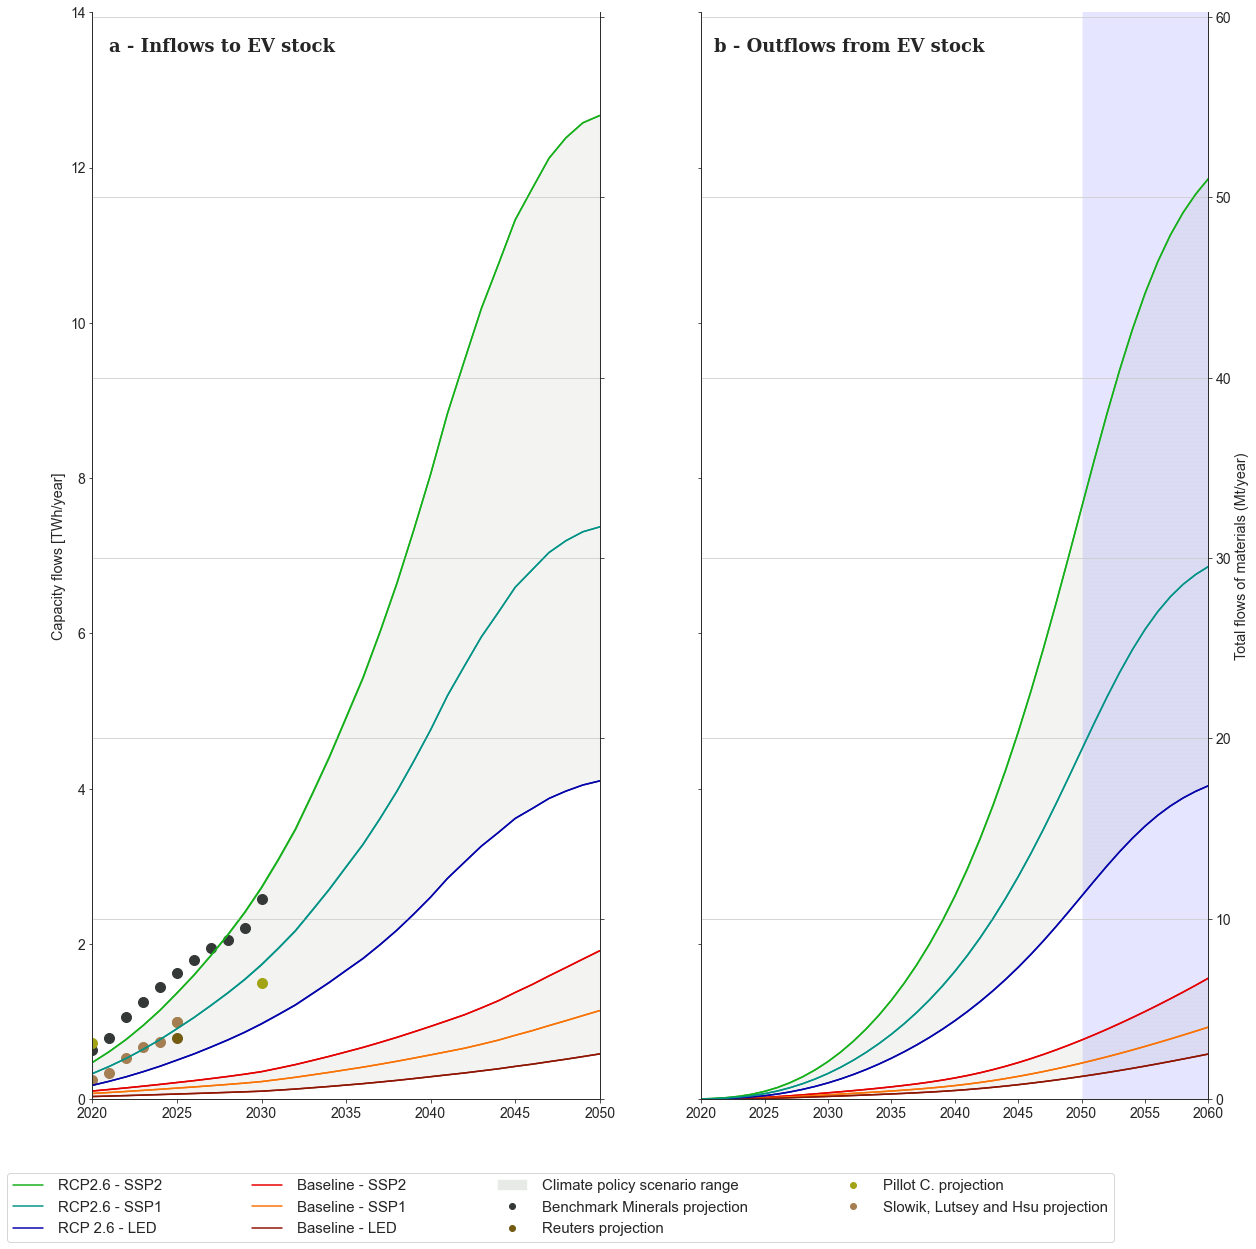

In [147]:
fig, ax = plt.subplots(figsize=(20,20), nrows = 1, ncols=2)

col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']
cols_scat = ['#343837','#735c12','#a2a415','#a57e52']


#customp = sns.set_palette(sns.color_palette(linecols))

x = addcap_total_base_SSP2.columns.values[5:36]
x = np.array(x, dtype = 'float')

ax[0].spines['top'].set_visible(False)

y1 = addcap_total_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y2 = addcap_total_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y3 = addcap_base_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]

y4 = addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y5 = addcap_total_RCP26_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]
y6 = addcap_RCP26_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:36]

ax[0].plot(x, y1, color = linecols[0])
ax[0].plot(x, y2, color = linecols[1])

ax[0].plot(x, y3, color = linecols[4])
ax[0].plot(x, y6, color = linecols[5])

ax[0].plot(x, y4, color = linecols[2])
ax[0].plot(x, y5, color = linecols[3])

ax[0].fill_between(x,y1,y3, color = col_background, alpha = .3)
ax[0].fill_between(x,y4,y6, color = col_background, alpha = .3)

#sns.scatterplot(data = prod_capacity.divide(1e3).transpose(), s = 100, ax = ax[0], palette = 'viridis', legend = None)


for i in range(4):
    yscat = prod_capacity.divide(1e3).loc[i]
    xscat1 = prod_capacity.columns.values
    ax[0].scatter(xscat1, yscat, color = cols_scat[i], s = 100)


ax[0].set_ylabel('Capacity flows [TWh/year]', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[0].set_ylim(0,max(addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)))

ax2 = ax[0].twinx()
ax2.spines['top'].set_visible(False)
ax2.grid(None)
y1 = matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y2 = matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y3 = matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]

y4 = matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y5 = matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]
y6 = matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36]

ax2.plot(x, y1, color = linecols[0])
ax2.plot(x, y2, color = linecols[1])

ax2.plot(x, y3, color = linecols[4])
ax2.plot(x, y6, color = linecols[5])

ax2.plot(x, y4, color = linecols[2])
ax2.plot(x, y5, color = linecols[3])




#ax2.set_ylabel('Material additions [Mt/year]', size = 'x-large')


ax2.set_ylim(0,max(matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)))
ax2.axes.yaxis.set_ticklabels([])
#ax2.set_yticks([])
x = cap_total_eol_base_SSP2.columns.values[5:46]
x = np.array(x, dtype = 'float')

ax[1].spines['top'].set_visible(False)

y1 = cap_total_eol_base_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y2 = cap_total_eol_base_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y3 = captotal_eol_base_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]

y4 = cap_total_eol_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y5 = cap_total_eol_RCP26_SSP1.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]
y6 = captotal_eol_RCP26_LED.divide(1e9).groupby('segment').sum().sum(axis = 0)[5:46]

ax[1].plot(x, y1, color = linecols[0])
ax[1].plot(x, y2, color = linecols[1])

ax[1].plot(x, y3, color = linecols[4])
ax[1].plot(x, y6, color = linecols[5])

ax[1].plot(x, y4, color = linecols[2])
ax[1].plot(x, y5, color = linecols[3])

ax[1].fill_between(x,y1,y3, color = col_background, alpha = .3)
ax[1].fill_between(x,y4,y6, color = col_background, alpha = .3)

ax[1].set_ylim(0,max(addcap_total_RCP26_SSP2.divide(1e9).groupby('segment').sum().sum(axis = 0)))
ax2 = ax[1].twinx()
ax2.spines['top'].set_visible(False)


y1 = matflows_eol_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y2 = matflows_eol_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y3 = matflow_eol_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]

y4 = matflows_eol_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y5 = matflows_eol_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]
y6 = matflow_eol_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:46]

ax2.plot(x, y1, color = linecols[0])
ax2.plot(x, y2, color = linecols[1])

ax2.plot(x, y3, color = linecols[4])
ax2.plot(x, y6, color = linecols[5])

ax2.plot(x, y4, color = linecols[2])
ax2.plot(x, y5, color = linecols[3])

ax[1].fill_between([2050,2060],[0,0],[12e9,12e9],facecolor='blue',
                alpha=0.1, hatch='...',edgecolor='w',zorder=1)


#sns.scatterplot(data = eol_capacity.divide(1e6).transpose(), ax = ax2, palette = ['black'])
ax[1].axes.yaxis.set_ticklabels([])
#ax[1].set_yticks([])
ax[0].tick_params(labelsize = 14)
ax[1].tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax2.set_ylabel('Total flows of materials (Mt/year)', size = 'x-large')
#ax[1].set_ylabel('Total capacity retired yearly [TWh/year]', size = 'x-large')
ax2.grid(None)

ax2.set_ylim(0,max(matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)))
ax[1].set_xlim(2020,2060)
ax[1].legend_ = None

ax[0].text(2021, 13.5, 'a - Inflows to EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
ax[1].text(2021, 13.5, 'b - Outflows from EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')

######### LEGEND ################

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat1 =  mlines.Line2D([], [], color = cols_scat[0], marker = '.', linestyle = '', label='Benchmark Minerals projection')
scat2 =  mlines.Line2D([], [], color = cols_scat[1], marker = '.', linestyle = '', label='Reuters projection')
scat3 =  mlines.Line2D([], [], color = cols_scat[2], marker = '.', linestyle = '', label='Pillot C. projection')
scat4 =  mlines.Line2D([], [], color = cols_scat[3], marker = '.', linestyle = '', label='Slowik, Lutsey and Hsu projection')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [line3,line4,line5, line1, line2, line6,range_int, scat1,scat2,scat3,scat4]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, .05), borderaxespad=0.1, handletextpad=1., columnspacing=6,fontsize=15, frameon=True, ncol= 4, markerscale = 2)


#plt.tight_layout()
#ax2.set_ylim(0,34.5)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
#plt.savefig('New figures\ew_new_Figure1.jpg', dpi = 600, bbox_inches = 'tight')


cap_base_SSP2_for = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0)
cost_base_SSP2 = cap_base_SSP2_for[1:46]*0

cap_RCP26_SSP2_for = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0) 
cost_RCP26_SSP2 = cap_base_SSP2_for[1:46]*0

In [148]:
cap_cumsum_RCP26_SSP2 = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_RCP26_SSP2 = cap_cumsum_RCP26_SSP2[1:46]*0

cap_cumsum_base_SSP2 = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_base_SSP2 = cap_cumsum_RCP26_SSP2[1:46]*0

cap_cumsum_RCP26_SSP1 = addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_RCP26_SSP1 = cap_cumsum_RCP26_SSP2[1:46]*0

cap_cumsum_base_SSP1 = addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_base_SSP1 = cap_cumsum_RCP26_SSP2[1:46]*0

cap_cumsum_RCP26_LED = addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_RCP26_LED = cap_cumsum_RCP26_SSP2[1:46]*0

cap_cumsum_base_LED = addcap_base_LED.groupby('chemistry').sum().sum(axis = 0).cumsum()
CAPEX_exp_base_LED = cap_cumsum_RCP26_SSP2[1:46]*0


In [149]:
b = float(-0.32)
for i in range(len(cap_cumsum_base_LED)):
    index = i + 2015
    A = 140/(cap_cumsum_RCP26_SSP1[2016]**b)
    
    #A = 140/(cap_cumsum_base_SSP2[2016]**b)
    CAPEX_exp_base_SSP2[index] = A * (cap_cumsum_base_SSP2[index]**b)

    #A = 140/(cap_cumsum_base_SSP1[2016]**b)
    CAPEX_exp_base_SSP1[index] = A * (cap_cumsum_base_SSP1[index]**b)

    #A = 140/(cap_cumsum_base_LED[2016]**b)
    CAPEX_exp_base_LED[index] = A * (cap_cumsum_base_LED[index]**b)

    #A = 140/(cap_cumsum_RCP26_SSP2[2016]**b)
    CAPEX_exp_RCP26_SSP2[index] = A * (cap_cumsum_RCP26_SSP2[index]**b)

    #A = 140/(cap_cumsum_RCP26_SSP1[2016]**b)
    CAPEX_exp_RCP26_SSP1[index] = A * (cap_cumsum_RCP26_SSP1[index]**b)

    #A = 140/(cap_cumsum_RCP26_LED[2016]**b)
    CAPEX_exp_RCP26_LED[index] = A * (cap_cumsum_RCP26_LED[index]**b)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


A = 62057
for i in range(len(cap_base_SSP2_for)):
    index = i + 2015
    cost_base_SSP2[index] = A * (test_base_SSP2[index]**(float(-0.32)))

A = 90150
for i in range(len(cap_base_SSP2_for)):
    index = i + 2015
    cost_RCP26_SSP2[index] = A * (test[index]**(float(-0.32)))

In [150]:
CAPEX_exp_RCP26_SSP2[2050]

12.713943953673366

In [151]:
CAPEX_exp_base_SSP2[2050]

24.446446451361396

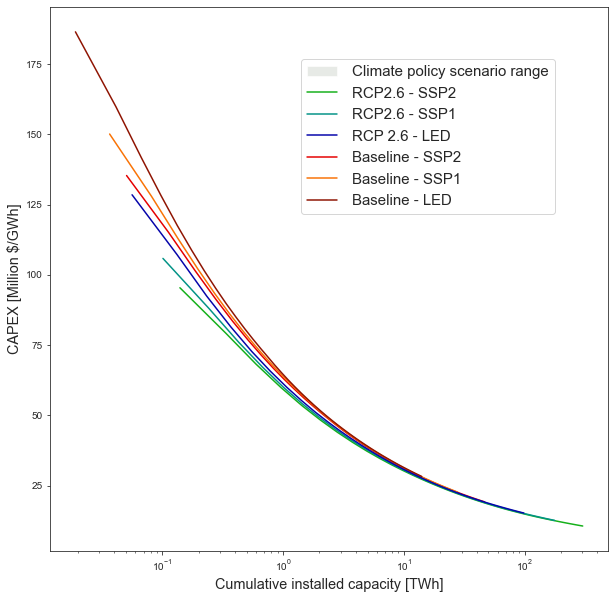

In [152]:
y1 = CAPEX_exp_base_SSP2[1:46]
y2 = CAPEX_exp_base_SSP1[1:46]
y3 = CAPEX_exp_RCP26_SSP2[1:46]
y4 = CAPEX_exp_RCP26_SSP1[1:46]
y5 = CAPEX_exp_base_LED[1:46]
y6 = CAPEX_exp_RCP26_LED[1:46]

x1 = addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x2 = addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x3 = addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x4 = addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x5 = addcap_base_LED.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]
x6 = addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).cumsum().div(1e9)[1:46]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x1, y1, color = linecols[0])
ax.plot(x2, y2, color = linecols[1])
ax.plot(x3, y3, color = linecols[2])
ax.plot(x4, y4, color = linecols[3])
ax.plot(x5, y5, color = linecols[4])
ax.plot(x6, y6, color = linecols[5])


ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Cumulative installed capacity [TWh]', fontsize = 'x-large')
ax.set_ylabel('CAPEX [Million $/GWh]', fontsize = 'x-large')

ax.legend_= None



line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
#range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
 #                           label='Climate policy scenario range')

lines = [range_int, line3,line4,line5, line1, line2, line6]

fig.legend(handles=lines, loc='center', bbox_to_anchor=(.65, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

#plt.savefig('New figures/Exp rates.jpg', dpi = 400, bbox_inches = 'tight')

In [153]:
new_capital_base_SSP2 = CAPEX_exp_base_SSP2.mul(addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())
new_capital_base_SSP1 = CAPEX_exp_base_SSP1.mul(addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())
new_capital_RCP26_SSP2 = CAPEX_exp_RCP26_SSP2.mul(addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())
new_capital_RCP26_SSP1 = CAPEX_exp_RCP26_SSP1.mul(addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())

new_capital_RCP26_LED = CAPEX_exp_RCP26_LED.mul(addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())
new_capital_base_LED = CAPEX_exp_base_LED.mul(addcap_base_LED.groupby('chemistry').sum().sum(axis = 0).divide(1e6).diff())

In [154]:
new_cumulative_CAPEX_RCP26_SSP2 = new_capital_RCP26_SSP2.cumsum()
new_cumulative_CAPEX_RCP26_SSP1 = new_capital_RCP26_SSP1.cumsum()
new_cumulative_CAPEX_base_SSP2 = new_capital_base_SSP2.cumsum()
new_cumulative_CAPEX_base_SSP1 = new_capital_base_SSP1.cumsum()

new_cumulative_CAPEX_RCP26_LED = new_capital_RCP26_LED.cumsum()
new_cumulative_CAPEX_base_LED = new_capital_base_LED.cumsum()

In [155]:

new_cumulative_CAPEX_RCP26_SSP2 = np.array(new_cumulative_CAPEX_RCP26_SSP2.div(1e3), dtype=float)
new_cumulative_CAPEX_RCP26_SSP1 = np.array(new_cumulative_CAPEX_RCP26_SSP1.div(1e3), dtype=float) 
new_cumulative_CAPEX_base_SSP2 = np.array(new_cumulative_CAPEX_base_SSP2.div(1e3), dtype=float)
new_cumulative_CAPEX_base_SSP1 = np.array(new_cumulative_CAPEX_base_SSP1.div(1e3), dtype=float)

new_cumulative_CAPEX_RCP26_LED = np.array(new_cumulative_CAPEX_RCP26_LED.div(1e3), dtype=float)
new_cumulative_CAPEX_base_LED = np.array(new_cumulative_CAPEX_base_LED.div(1e3), dtype=float)

(0.0, 350.0)

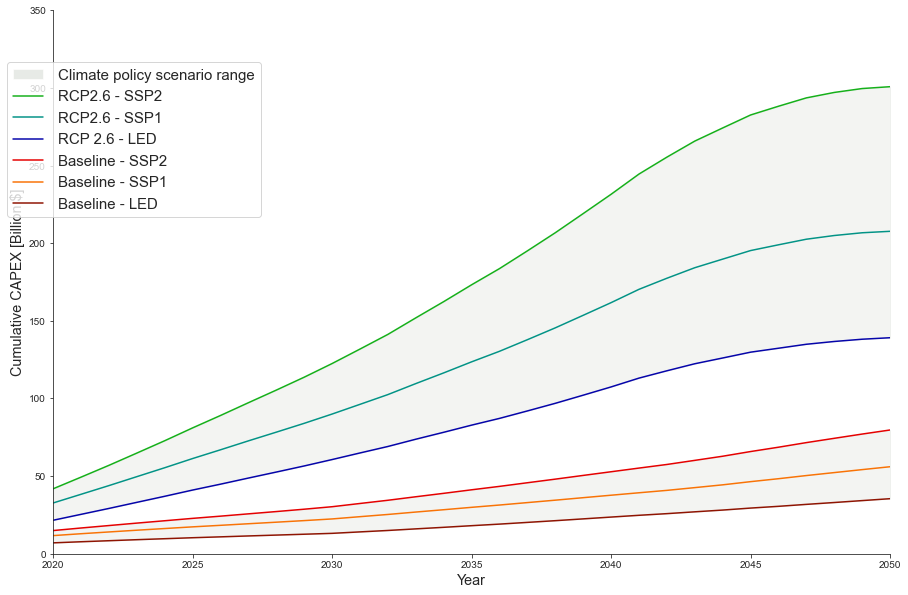

In [156]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(figsize = (15,10))
#ax.set_title('Cumulative CAPEX', size = 'x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative CAPEX [Billion $]', size = 'x-large')

ax.set_xlabel('Year', size = 'x-large')
x = addcap_total_base_SSP2.columns.values[5:36]
x = np.array(x, dtype = 'float')

y1 = new_cumulative_CAPEX_RCP26_SSP2[5:36]#.sum(axis = 0)
y2 = new_cumulative_CAPEX_RCP26_SSP1[5:36]#.sum(axis = 0)[5:36]
y3 = new_cumulative_CAPEX_RCP26_LED[5:36]#.sum(axis = 0)[5:36]
y4 = new_cumulative_CAPEX_base_SSP2[5:36]#.sum(axis = 0)[5:36]
y5 = new_cumulative_CAPEX_base_SSP1[5:36]#.sum(axis = 0)[5:36]
y6 = new_cumulative_CAPEX_base_LED[5:36]#.sum(axis = 0)[5:36]

##Cumulative employment
ax.plot(x,y1,color = linecols[2]) 
ax.plot(x,y2, color = linecols[3])
ax.plot(x,y3,color = linecols[5])

ax.plot(x,y4, color = linecols[0]) 
ax.plot(x,y5, color = linecols[1])
ax.plot(x,y6, color = linecols[4])

ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
ax.fill_between(x, y1,y3, color = col_background, alpha = .3)

ax.legend_= None

#ax[0].set_ylim(0,50)
#ax[1].set_ylim(0,800)

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.2, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

#ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
#ax.fill_between(x, y1,y3, color = col_background, alpha = .3)
ax.set_ylim(0,350)

#plt.savefig('New figures/CAPEX_exprates.jpg', dpi = 400, bbox_inches = 'tight')

In [157]:
index = [2025, 2030, 2035, 2040, 2045, 2050]
arr_dfs = [addcap_total_base_SSP1.groupby('chemistry').sum().sum(axis = 0), addcap_total_base_SSP2.groupby('chemistry').sum().sum(axis = 0),addcap_base_LED.groupby('chemistry').sum().sum(axis = 0), 
addcap_total_RCP26_SSP1.groupby('chemistry').sum().sum(axis = 0), addcap_total_RCP26_SSP2.groupby('chemistry').sum().sum(axis = 0), addcap_RCP26_LED.groupby('chemistry').sum().sum(axis = 0)]

In [158]:
CAGRs_cap = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])
CAGRs_test = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])

CAGRs_tot_mat = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])

In [159]:
test_material = [matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0), matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0), matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0),
matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0), matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0), matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)]

In [160]:
#for j in range(len(arr_dfs)):
for i, l in zip(index, range(len(index))) :  #for k in range(len(arr_dfs)):
    for k in range(len(arr_dfs)):
        CAGRs_tot_mat.iloc[l,k] = (test_material[k][i]/test_material[k][int(i-5)])**(1/5)-1

#for j in range(len(arr_dfs)):
for i, l in zip(index, range(len(index))) :  #for k in range(len(arr_dfs)):
    for k in range(len(arr_dfs)):
        CAGRs_test.iloc[l,k] = (arr_dfs[k][i]/arr_dfs[k][int(i-5)])**(1/(i-int(i-5)))-1

#for j in range(len(arr_dfs)):
for i, l in zip(index, range(len(index))) :  #for k in range(len(arr_dfs)):
    for k in range(len(arr_dfs)):
        CAGRs_cap.iloc[l,k] = (arr_dfs[k][i]/arr_dfs[k][2020])**(1/(i-2020))-1

In [161]:
arr_mat = [matadd_base_SSP1.divide(1e9).groupby('material').sum(), matadd_base_SSP2.divide(1e9).groupby('material').sum(), matadd_base_LED.divide(1e9).groupby('material').sum(),
matadd_RCP26_SSP1.divide(1e9).groupby('material').sum(), matadd_RCP26_SSP2.divide(1e9).groupby('material').sum(), matadd_RCP26_LED.divide(1e9).groupby('material').sum()]

In [162]:
#CAGRs_mat = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])
CAGRs_mat_Li  = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])
CAGRs_mat_Co  = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])
CAGRs_mat_Graphite  = pd.DataFrame(index = np.arange(len(index)), columns = ['Baseline SSP1','Baseline SSP2','Baseline LED','RCP2.6 SSP1', 'RCP2.6 SSP2', 'RCP2.6 LED'])

In [163]:
for i, l in zip(index, range(len(index))) :  
    for k in range(len(arr_mat)):
        CAGRs_mat_Li.iloc[l,k] = (arr_mat[k].loc['Li'][i]/arr_mat[k].loc['Li'][int(i-5)])**(1/(i-int(i-5)))-1
        CAGRs_mat_Co.iloc[l,k] = (arr_mat[k].loc['Co'][i]/arr_mat[k].loc['Co'][int(i-5)])**(1/(i-int(i-5)))-1
        CAGRs_mat_Graphite.iloc[l,k] = (arr_mat[k].loc['Graphite'][i]/arr_mat[k].loc['Graphite'][int(i-5)])**(1/(i-int(i-5)))-1
       

In [164]:
cement_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 2, nrows = 1, usecols = 'CE:DN')
alu_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 3, nrows = 1, usecols = 'CE:DN')
steel_CN_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 4, nrows = 1, usecols = 'CE:DN')

steel_CN_prod.columns = cement_prod.columns.values
alu_prod.columns = cement_prod.columns.values

historical_prod = [cement_prod,alu_prod,steel_CN_prod]

In [165]:
index_historical = [1990, 1995, 2000, 2005, 2010, 2015]
CAGRs_historical = pd.DataFrame(index = np.arange(len(index_historical)), columns = ['Cement','Aluminium','Steel'])

In [166]:
for i, l in zip(index_historical, range(len(index_historical))) :  #for k in range(len(arr_dfs)):
    for k in range(len(historical_prod)):
        CAGRs_historical.iloc[l,k] = (int(historical_prod[k][i])/int(historical_prod[k][(i-5)]))**(1/(i-int(i-5)))-1

In [167]:
CAGRs_historical

,Cement,Aluminium,Steel
0,0.038704,0.046182,0.072334
1,0.044917,0.004111,0.075239
2,0.02813,0.042865,0.061469
3,0.071993,0.055934,0.225909
4,0.06961,0.055546,0.124156
5,0.042956,0.065855,0.047049


In [168]:
CAGRs_tot_mat

,Baseline SSP1,Baseline SSP2,Baseline LED,RCP2.6 SSP1,RCP2.6 SSP2,RCP2.6 LED
0,0.14034,0.150586,0.137462,0.22372,0.235511,0.228307
1,0.095645,0.10477,0.08927,0.13755,0.147647,0.140031
2,0.107971,0.114018,0.119539,0.115592,0.125159,0.113053
3,0.085118,0.090244,0.096921,0.097357,0.103994,0.094441
4,0.075753,0.079291,0.078092,0.067467,0.07067,0.06796
5,0.067588,0.068178,0.066432,0.022585,0.022721,0.025459


In [169]:
CAGRs_historical.rename(index = {0:'5', 1:'10',2:'15',3:'20',4:'25',5:'30'},inplace = True) 
CAGRs_tot_mat.rename(index = {0:'5', 1:'10',2:'15',3:'20',4:'25',5:'30'},inplace = True) 

CAGRs_historical = CAGRs_historical.astype('float')
CAGRs_tot_mat = CAGRs_tot_mat.astype('float')


CAGRs_mat_Li.rename(index = {0:'5', 1:'10',2:'15',3:'20',4:'25',5:'30'},inplace = True) 
CAGRs_mat_Co.rename(index = {0:'5', 1:'10',2:'15',3:'20',4:'25',5:'30'},inplace = True) 
CAGRs_mat_Graphite.rename(index = {0:'5', 1:'10',2:'15',3:'20',4:'25',5:'30'},inplace = True) 

CAGRs_mat_Li = CAGRs_mat_Li.astype('float')
CAGRs_mat_Co = CAGRs_mat_Co.astype('float')
CAGRs_mat_Graphite = CAGRs_mat_Graphite.astype('float')


In [170]:
rcp_y = np.empty(len(CAGRs_tot_mat), dtype = float)

In [171]:
CAGR_Co_base = CAGRs_mat_Co.iloc[:,0:3]
CAGR_Li_base = CAGRs_mat_Li.iloc[:,0:3]
CAGR_Graphite_base = CAGRs_mat_Graphite.iloc[:,0:3]

CAGR_Co_RCP = CAGRs_mat_Co.iloc[:,3:6]
CAGR_Li_RCP = CAGRs_mat_Li.iloc[:,3:6]
CAGR_Graphite_RCP = CAGRs_mat_Graphite.iloc[:,3:6]

In [172]:
min_max_baseline = pd.DataFrame(index = [0,1], columns = CAGRs_historical.transpose().columns.values)
min_max_RCP = pd.DataFrame(index = [0,1], columns = CAGRs_historical.transpose().columns.values)
for i in range(len(CAGRs_historical.transpose().columns.values.astype('int'))):
    min_max_baseline.iloc[0,i] = min(CAGRs_tot_mat.iloc[i][0:3])
    min_max_baseline.iloc[1,i] = max(CAGRs_tot_mat.iloc[i][0:3])

    min_max_RCP.iloc[0,i] = min(CAGRs_tot_mat.iloc[i][3:6])
    min_max_RCP.iloc[1,i] = max(CAGRs_tot_mat.iloc[i][3:6])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:132: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:133: UserWarning: FixedFormatter should only be used together with FixedLocator
No handles with labels found to put in legend.


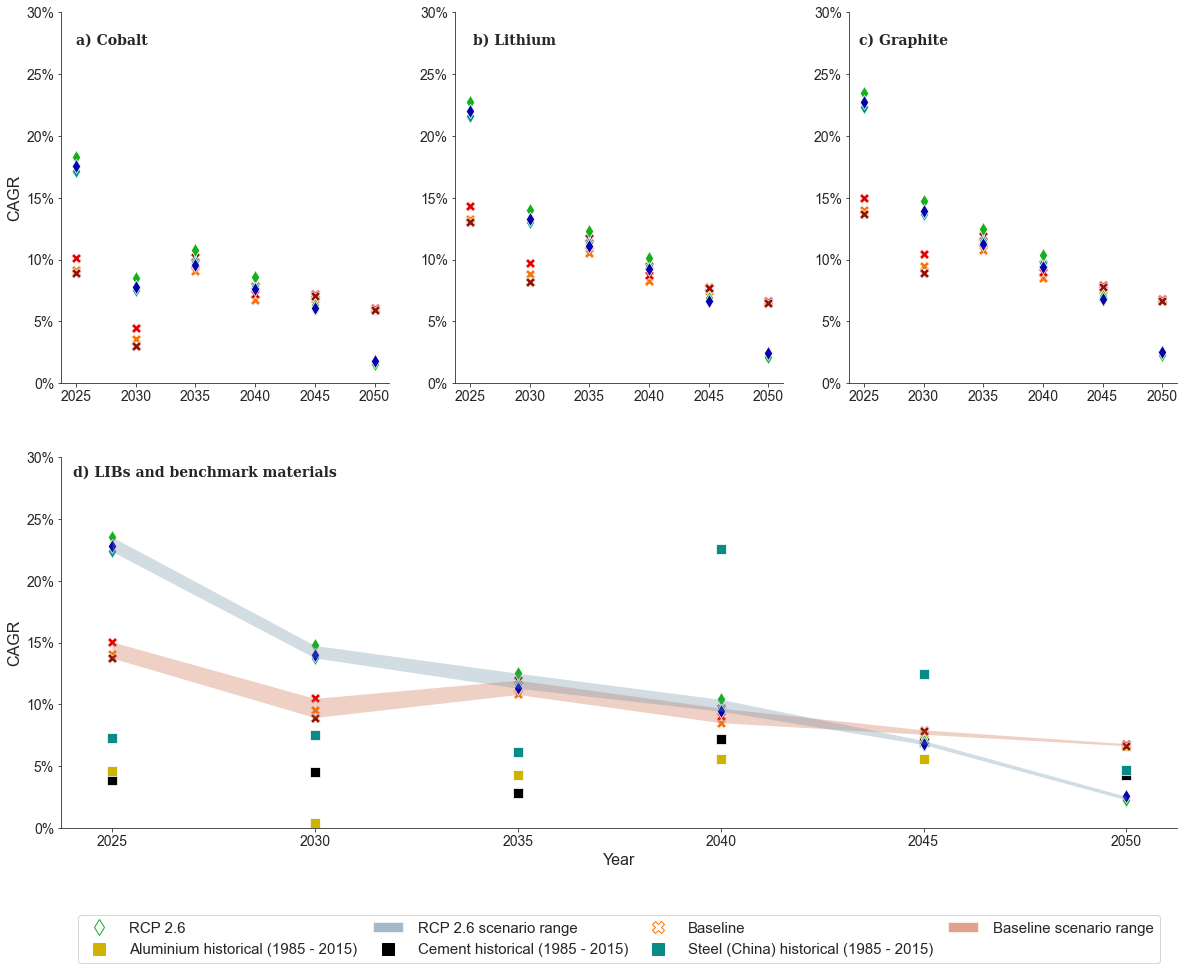

In [173]:

gs = gridspec.GridSpec(2,3)
fig = plt.subplots(figsize=(20,15))
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[3:])
ax3.set(xlabel = 'Steel')

colors = ['#0b8b87','#fd3c06','#000000','#ceb301']
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']
col_background = ['#6b8ba4','#ca6641']

customp = sns.set_palette(sns.color_palette(linecols))

x = CAGRs_historical.transpose().columns.values.astype('int')
y1_cem = CAGRs_historical.transpose().loc['Cement']
y2_al = CAGRs_historical.transpose().loc['Aluminium']
y3_steel = CAGRs_historical.transpose().loc['Steel']


sns.scatterplot(x, y1_cem, color = colors[2], marker = 's', s= 100, ax = ax3)
sns.scatterplot(x, y2_al, color = colors[3], marker = 's', s= 100, ax = ax3)
sns.scatterplot(x, y3_steel, color = colors[0], marker = 's', s= 100, ax = ax3)


## SECOND PLOT _ LITHIUM 
## Baseline
y1 = CAGR_Co_base.transpose().iloc[0]
y2 = CAGR_Co_base.transpose().iloc[1]
y3 = CAGR_Co_base.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[1], marker = 'X', s= 100, ax = ax0)
sns.scatterplot(x, y2, color = linecols[0], marker = 'X', s= 100, ax = ax0)
sns.scatterplot(x, y3, color = linecols[4], marker = 'X', s= 100, ax = ax0)

## RCP 2.6

y1 = CAGR_Co_RCP.transpose().iloc[0]
y2 = CAGR_Co_RCP.transpose().iloc[1]
y3 = CAGR_Co_RCP.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[3], marker = 'd', s= 100, ax = ax0)
sns.scatterplot(x, y2, color = linecols[2], marker = 'd', s= 100, ax = ax0)
sns.scatterplot(x, y3, color = linecols[5], marker = 'd', s= 100, ax = ax0)



## SECOND PLOT _ LITHIUM 
## Baseline
y1 = CAGR_Li_base.transpose().iloc[0]
y2 = CAGR_Li_base.transpose().iloc[1]
y3 = CAGR_Li_base.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[1], marker = 'X', s= 100, ax = ax1)
sns.scatterplot(x, y2, color = linecols[0], marker = 'X', s= 100, ax = ax1)
sns.scatterplot(x, y3, color = linecols[4], marker = 'X', s= 100, ax = ax1)

## RCP 2.6

y1 = CAGR_Li_RCP.transpose().iloc[0]
y2 = CAGR_Li_RCP.transpose().iloc[1]
y3 = CAGR_Li_RCP.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[3], marker = 'd', s= 100, ax = ax1)
sns.scatterplot(x, y2, color = linecols[2], marker = 'd', s= 100, ax = ax1)
sns.scatterplot(x, y3, color = linecols[5], marker = 'd', s= 100, ax = ax1)

## SECOND PLOT _ LITHIUM 
## Baseline
y1 = CAGR_Graphite_base.transpose().iloc[0]
y2 = CAGR_Graphite_base.transpose().iloc[1]
y3 = CAGR_Graphite_base.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[1], marker = 'X', s= 100, ax = ax2)
sns.scatterplot(x, y2, color = linecols[0], marker = 'X', s= 100, ax = ax2)
sns.scatterplot(x, y3, color = linecols[4], marker = 'X', s= 100, ax = ax2)

## RCP 2.6

y1 = CAGR_Graphite_RCP.transpose().iloc[0]
y2 = CAGR_Graphite_RCP.transpose().iloc[1]
y3 = CAGR_Graphite_RCP.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[3], marker = 'd', s= 100, ax = ax2)
sns.scatterplot(x, y2, color = linecols[2], marker = 'd', s= 100, ax = ax2)
sns.scatterplot(x, y3, color = linecols[5], marker = 'd', s= 100, ax = ax2)

## LAST ROW _ TOT BATTERY

## Baseline
y1 = CAGRs_tot_mat.transpose().iloc[0]
y2 = CAGRs_tot_mat.transpose().iloc[1]
y3 = CAGRs_tot_mat.transpose().iloc[2]

sns.scatterplot(x, y1, color = linecols[1], marker = 'X', s= 100, ax = ax3)
sns.scatterplot(x, y2, color = linecols[0], marker = 'X', s= 100, ax = ax3)
sns.scatterplot(x, y3, color = linecols[4], marker = 'X', s= 100, ax = ax3)


y1 = min_max_baseline.iloc[0].astype(float)
y2 = min_max_baseline.iloc[1].astype(float)
ax3.fill_between(x, y1, y2, color = col_background[1], alpha = .3, linewidth = 0.0)



## RCP 2.6

y1 = CAGRs_tot_mat.transpose().iloc[3]
y2 = CAGRs_tot_mat.transpose().iloc[4]
y3 = CAGRs_tot_mat.transpose().iloc[5]

sns.scatterplot(x, y1, color = linecols[3], marker = 'd', s= 100, ax = ax3)
sns.scatterplot(x, y2, color = linecols[2], marker = 'd', s= 100, ax = ax3)
sns.scatterplot(x, y3, color = linecols[5], marker = 'd', s= 100, ax = ax3)


y1 = min_max_RCP.iloc[0].astype(float)
y2 = min_max_RCP.iloc[1].astype(float)

ax3.fill_between(x, y1, y2, color = col_background[0], alpha = .3, linewidth = 0.0)

ax3.set_xticklabels([2020,2025,2030,2035,2040,2045,2050])

ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax0.set_xticklabels([2020 - 2025,2025,2030,2035,2040,2045,2050])
ax1.set_xticklabels([2020,2025,2030,2035,2040,2045,2050])
ax2.set_xticklabels([2020,2025,2030,2035,2040,2045,2050])


ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax0.set_ylim(0,0.3)

ax1.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax3.tick_params(labelsize = 14)

ax0.tick_params(labelsize = 14)

ax1.set_ylim(0,0.3)
ax2.set_ylim(0,0.3)
ax3.set_ylim(0,0.3)

ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.legend()
ax0.set_ylabel('CAGR', fontsize = 16)
ax1.set_ylabel('', fontsize = 16)
ax2.set_ylabel('', fontsize = 16)
ax3.set_xlabel('', fontsize = 16)


ax3.set_ylabel('CAGR', fontsize = 16)


plt.figtext(0.16, 0.85, "a) Cobalt", ha="center", fontsize=14, fontfamily = 'serif', fontweight = 'bold')

plt.figtext(0.44, 0.85, "b) Lithium", ha="center", fontsize=14, fontfamily = 'serif', fontweight = 'bold')

plt.figtext(0.71, 0.85, "c) Graphite", ha="center", fontsize=14, fontfamily = 'serif', fontweight = 'bold')


plt.figtext(0.225, 0.45, "d) LIBs and benchmark materials", ha="center", fontsize=14, fontfamily = 'serif', fontweight = 'bold')



ax3.set_xlabel('Year', fontsize = 16)

 ##### LEGEND #####
range_rcp = mpatches.Patch(color = col_background[0], ec = None, alpha = 0.6, label = 'RCP 2.6 scenario range')
range_base = mpatches.Patch(color = col_background[1], ec = None, alpha = 0.6, label = 'Baseline scenario range')


scat_rcp =  mlines.Line2D([], [], markerfacecolor = 'None', markeredgecolor =linecols[2] , marker = 'd', linestyle = '', label='RCP 2.6')
scat_base =  mlines.Line2D([], [], markerfacecolor = 'None', markeredgecolor =linecols[1] , marker = 'X' , linestyle = '',label='Baseline')

scatal =  mlines.Line2D([], [], color = colors[3], marker = 's', linestyle = '', label='Aluminium historical (1985 - 2015)')
scatcem =  mlines.Line2D([], [], color = colors[2], marker = 's', linestyle = '', label='Cement historical (1985 - 2015)')
scatsteel =  mlines.Line2D([], [], color = colors[0], marker = 's', linestyle = '', label='Steel (China) historical (1985 - 2015)')



#handles_BEV2 = [baseline_marker]
#lines = [scatal, scatcem, scatsteel, scat_rcp, scat_base, range_rcp, range_base]#, scat1, scat2]
lines = [scat_rcp, scatal,  range_rcp,  scatcem, scat_base, scatsteel, range_base]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax3.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.3 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=15, frameon=True, ncol = 4, markerscale = 2)


#plt.savefig('Battery production vs cement and aluminium.jpg', dpi  = 1200, bbox_inches = 'tight')
#plt.savefig('New figures/CAGRs_new_test_20x20.jpg', dpi  = 400, bbox_inches = 'tight')

In [174]:
mining_rate_2025.div(1e9)

,Al,Co,Cu,Graphite,Li,Mn,Ni,Plastics,Steel
0,0.0,0.25,0.0,1.1,0.155,0.0,27.0,0.0,0.0


In [175]:
average_CAGR_RCPSSP2_first15 = (((material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1
average_CAGR_baseSSP2_first15 = (((material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1
average_CAGR_RCPLED_first15 = (((material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1
average_CAGR_baseLED_first15 = (((material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1



average_CAGR_RCPSSP2_last15 = (((material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1
average_CAGR_baseSSP2_last15 = (((material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1
average_CAGR_RCPLED_last15 = (((material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1
average_CAGR_baseLED_last15 = (((material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1

In [176]:
average_CAGR_RCP_first15 = (((material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1
average_CAGR_baseline_first15 = (((material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[2035])/(material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[2020]))**(1/(15)))-1

average_CAGR_RCP_last15 = (((material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1
average_CAGR_baseline_last15 = (((material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[2050])/(material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[2035]))**(1/(15)))-1

In [177]:
average_mat_demand_RCPSSP2_first15 = 0
average_mat_demand_baseSSP2_first15 = 0
average_mat_demand_RCPSSP2_later15 = 0
average_mat_demand_baseSSP2_later15 = 0
average_mat_demand_RCPLED_first15 = 0
average_mat_demand_baseLED_first15 = 0
average_mat_demand_RCPLED_later15 = 0
average_mat_demand_baseLED_later15 = 0

for i in range(2020,2036):
    average_mat_demand_RCPSSP2_first15 += material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_baseSSP2_first15 += material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[i]                       
    average_mat_demand_RCPLED_first15 += material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_baseLED_first15 += material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[i]  


average_mat_demand_RCPSSP2_first15 = average_mat_demand_RCPSSP2_first15/15 
average_mat_demand_baseSSP2_first15 = average_mat_demand_baseSSP2_first15/15 
average_mat_demand_RCPLED_first15 = average_mat_demand_RCPLED_first15/15 
average_mat_demand_baseLED_first15 = average_mat_demand_baseLED_first15/15 

    
for i in range(2035,2051):
    average_mat_demand_RCPSSP2_later15 += material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_baseSSP2_later15 += material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_RCPLED_later15 += material_add_tot_RCP26_LED.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_baseLED_later15 += material_add_tot_base_LED.groupby('material').sum().sum(axis = 0)[i]

average_mat_demand_RCPSSP2_later15 = average_mat_demand_RCPSSP2_later15/15 
average_mat_demand_baseSSP2_later15 = average_mat_demand_baseSSP2_later15/15 
average_mat_demand_RCPLED_later15 = average_mat_demand_RCPLED_later15/15 
average_mat_demand_baseLED_later15 = average_mat_demand_baseLED_later15/15 

In [178]:
material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2023]/1e9

2.7673735396531

In [179]:
material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[2035]/1e9

12.865393275796004

In [180]:
average_mat_demand_RCP_first15 = 0
average_mat_demand_base_first15 = 0
average_mat_demand_RCP_later15 = 0
average_mat_demand_base_later15 = 0


for i in range(2020,2036):
    average_mat_demand_RCP_first15 += material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_base_first15 += material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[i]

average_mat_demand_RCP_first15 = average_mat_demand_RCP_first15/15 
average_mat_demand_base_first15 = average_mat_demand_base_first15/15 

    
for i in range(2035,2051):
    average_mat_demand_RCP_later15 += material_add_tot_RCP26_SSP1.groupby('material').sum().sum(axis = 0)[i]
    average_mat_demand_base_later15 += material_add_tot_base_SSP1.groupby('material').sum().sum(axis = 0)[i]

average_mat_demand_RCP_later15 = average_mat_demand_RCP_later15/15 
average_mat_demand_base_later15 = average_mat_demand_base_later15/15 

In [181]:
PCs_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 5, nrows = 1, usecols = 'CY:DN')
smartphones_prod = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 6, nrows = 1, usecols = 'DF:DN')
solar_PV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 7, nrows = 1, usecols = 'CY:DN')


In [182]:
PCs_prod.columns = range(2000,2016)
solar_PV.columns = range(2000,2016)
smartphones_prod.columns = range(2007,2016)

In [183]:
CAGR_PCs = (PCs_prod[2015]/PCs_prod[2000])**(1/15)-1
CAGR_smartphones = (smartphones_prod[2015]/smartphones_prod[2007])**(1/15)-1
CAGR_PV = (solar_PV[2015]/solar_PV[2000])**(1/15)-1

In [184]:
PCs_average = 0
PV_average = 0
smartphones_average = 0

for i in range(2000,2016):
    PCs_average += PCs_prod[i]
    PV_average += solar_PV[i]

PCs_average = PCs_average/15
PV_average = PV_average/15

for i in range(2007,2016):
    smartphones_average += smartphones_prod[i]
    
smartphones_average = smartphones_average/9

In [185]:
CAGRs_new_fig = [average_CAGR_RCP_first15, average_CAGR_baseline_first15, average_CAGR_RCP_last15, average_CAGR_baseline_last15, CAGR_PCs, CAGR_PV, CAGR_smartphones]

materialsave_new_fig = [average_mat_demand_RCP_first15, average_mat_demand_base_first15, average_mat_demand_RCP_later15, average_mat_demand_base_later15, int(PCs_average.values), int(PV_average.values), int(smartphones_average.values)]


CAGRs_new_fig_NEW = [average_CAGR_RCP_first15, average_CAGR_RCPSSP2_first15,average_CAGR_RCPLED_first15,
average_CAGR_baseline_first15,average_CAGR_baseSSP2_first15,average_CAGR_baseLED_first15,
average_CAGR_RCP_last15,average_CAGR_RCPSSP2_last15,average_CAGR_RCPLED_last15,
average_CAGR_baseline_last15,average_CAGR_baseSSP2_last15,average_CAGR_baseLED_last15,
CAGR_PCs, CAGR_PV, CAGR_smartphones]


materialsave_new_fig_NEW = [average_mat_demand_RCP_first15, average_mat_demand_RCPSSP2_first15,average_mat_demand_RCPLED_first15,
average_mat_demand_base_first15,average_mat_demand_baseSSP2_first15,average_mat_demand_baseLED_first15,
average_mat_demand_RCP_later15,average_mat_demand_RCPSSP2_later15,average_mat_demand_RCPLED_later15,
average_mat_demand_base_later15,average_mat_demand_baseSSP2_later15,average_mat_demand_baseLED_later15,
int(PCs_average.values), int(PV_average.values), int(smartphones_average.values)]

index_new_fig = ['mat_RCP(2020-2035)','mat_baseline(2020-2035)','mat_RCP(2035-2050)','mat_baseline(2035-2050)','PCs (2000-2015)','PV (2000-2015)', 'smartphones (2007-2015)']

new_df = pd.DataFrame(index = index_new_fig, columns = ['CAGR','Average weight per year'])

In [186]:
for i in range(len(materialsave_new_fig)):
        print(materialsave_new_fig[i]/(1e9))

6.518437023696974
0.9155264888543175
25.32764274502891
3.2901650018561646
5.422133333
3.240773333
0.122704888


In [187]:
CAGR_test = material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)*0

CAGR_test_2 = material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)*0


In [188]:
range(2020,2050)

range(2020, 2050)

In [189]:
for i in range(2020,2036):
    CAGR_test[i] = (material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[i])/(material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0)[i-1])**(1/1)-1
    CAGR_test_2[i] = (material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[i])/(material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0)[i-1])**(1/1)-1

(0.01, 100.0)

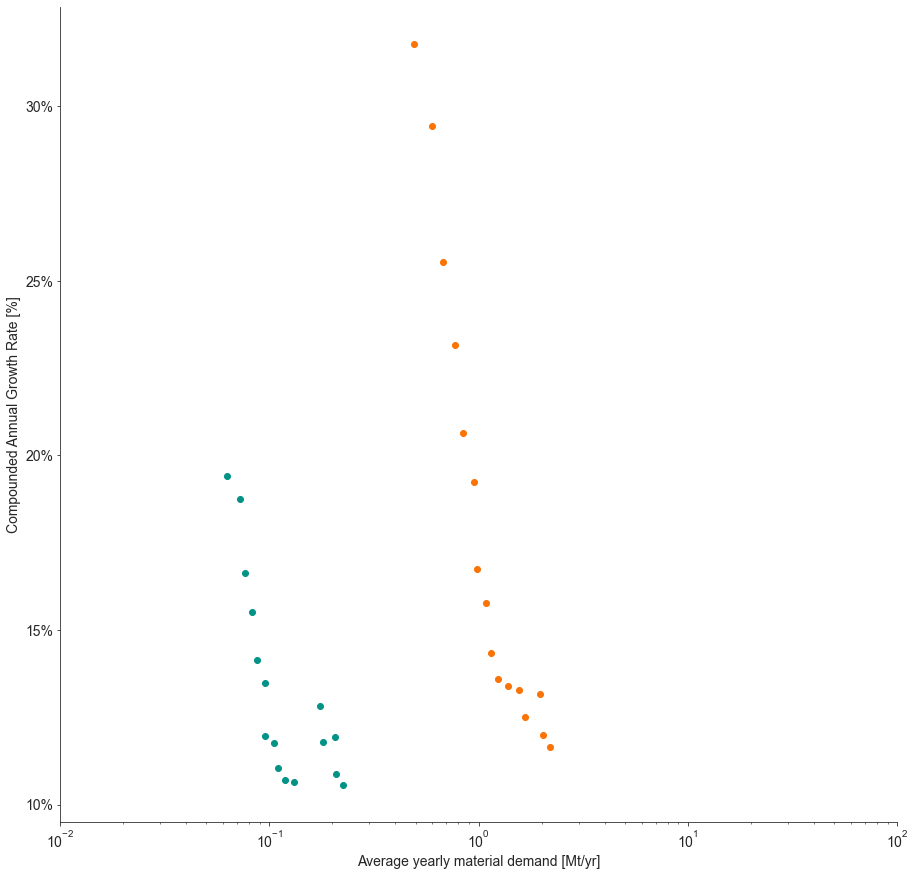

In [190]:
#linecols = ['#15b01a','#f97306','#029386','#e50000','#8f1402','#0504aa','#c69c04']
markers = ['d','X','d','X','s','s','s']
linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa']

fig, ax = plt.subplots(figsize = (15,15))
for i in range(2020,2036):
    x = material_add_tot_RCP26_SSP2.groupby('material').sum().sum(axis = 0).diff()[i]/1e9
    y = CAGR_test[i]
    ax.scatter(x, y, color = linecols[1])#, marker = markers[i], color = linecols[i], s = 100)
    
    x = material_add_tot_base_SSP2.groupby('material').sum().sum(axis = 0).diff()[i]/1e9
    y = CAGR_test_2[i]
    ax.scatter(x, y, color = linecols[3])#, marker = markers[i], color = linecols[i], s = 100)


ax.set_xscale('log')
ax.set_ylabel('Compounded Annual Growth Rate [%]', fontsize = 14)
ax.set_xlabel('Average yearly material demand [Mt/yr]', fontsize = 14)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_xlim(1e-2,1e2)

In [191]:
CAGRs_new_fig

[0.15802859657792,
 0.11449355458003407,
 0.062022678134294074,
 0.07612909818207614,
 0    0.051893
 dtype: float64,
 0    0.277787
 dtype: float64,
 0    0.177784
 dtype: float64]

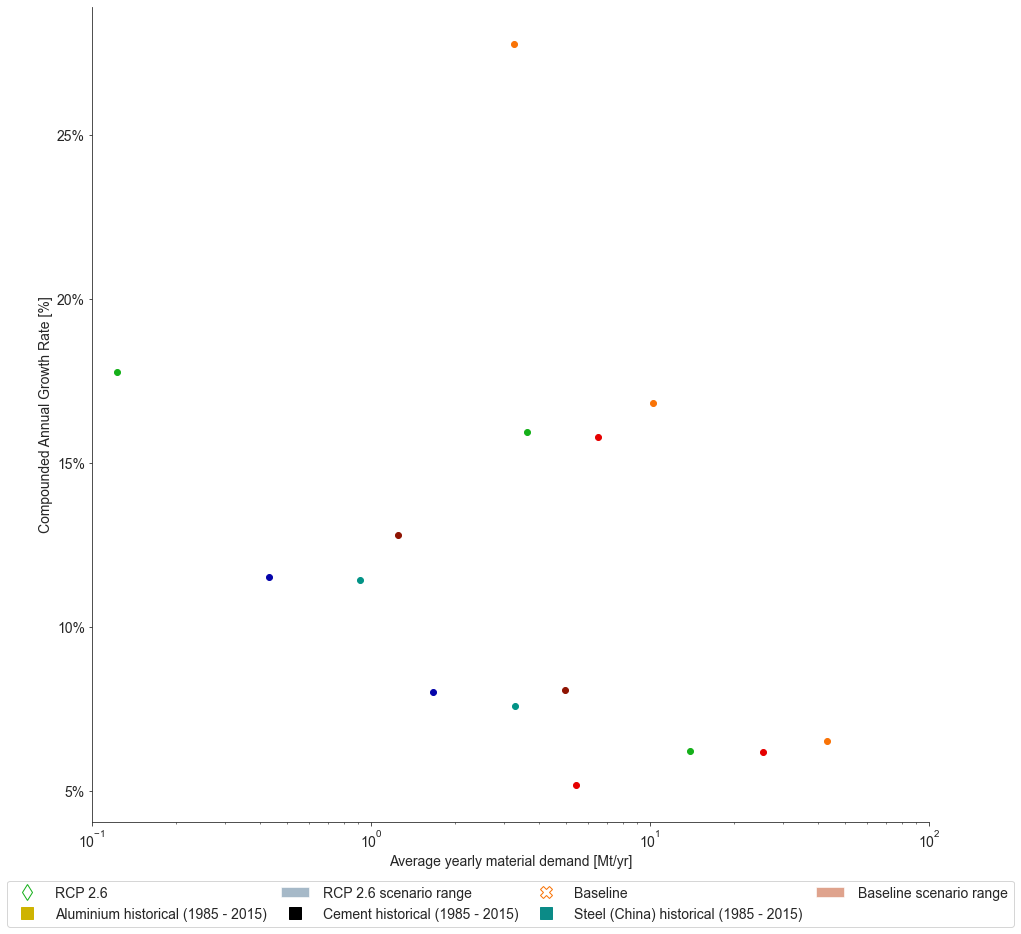

In [192]:
#linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa','#06c2ac']
linecols = ['#15b01a','#f97306','#029386','#e50000','#8f1402','#0504aa','#c69c04']
markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materialsave_new_fig_NEW)):
    x = materialsave_new_fig_NEW[i]/1e9
    y = CAGRs_new_fig_NEW[i]
    ax.scatter(x, y)#, marker = markers[i], color = linecols[i], s = 100)

ax.set_xscale('log')
ax.set_ylabel('Compounded Annual Growth Rate [%]', fontsize = 14)
ax.set_xlabel('Average yearly material demand [Mt/yr]', fontsize = 14)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_xlim(1e-1,1e2)
##### LEGEND #####

#rcp_first15 = mlines.Line2D([], [],color = linecols[0], marker = 'd', linestyle = '',label = 'Average RCP (2020-2035)')
#base_first15 = mlines.Line2D([], [],color = linecols[1], marker = 'X', linestyle = '',label = 'Average baseline (2020-2035)')
#rcp_last15 = mlines.Line2D([], [],color = linecols[2], marker = 'd', linestyle = '',label = 'Average RCP (2035-2050)')
#base_last15 = mlines.Line2D([], [],color = linecols[3], marker = 'X', linestyle = '',label = 'Average baseline (2035-2050)')


#pcs =  mlines.Line2D([], [], color = linecols[4], marker = 's', linestyle = '', label='Personal computers (2000 - 201515)')
#PV =  mlines.Line2D([], [], color = linecols[5], marker = 's', linestyle = '', label='Solar PV (2000 - 2015)')
#smartphones =  mlines.Line2D([], [], color = linecols[6], marker = 's', linestyle = '', label='Smartphones (2007 - 2015)')



#handles_BEV2 = [baseline_marker]
#lines = [scatal, scatcem, scatsteel, scat_rcp, scat_base, range_rcp, range_base]#, scat1, scat2]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/newfig_CAGRs vs mat.jpg', bbox_inches = 'tight', dpi = 600)

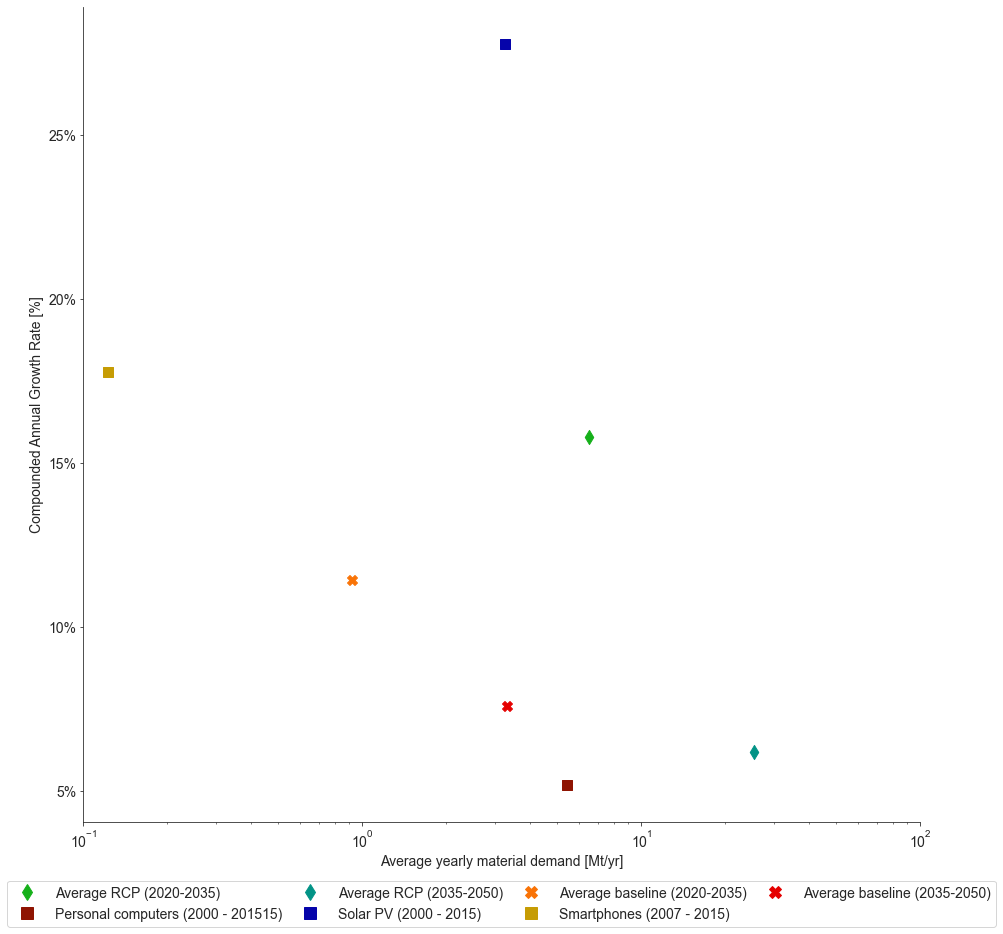

In [193]:
#linecols = ['#e50000','#f97306','#15b01a','#029386','#8f1402','#0504aa','#06c2ac']
linecols = ['#15b01a','#f97306','#029386','#e50000','#8f1402','#0504aa','#c69c04']
markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materialsave_new_fig)):
    x = materialsave_new_fig[i]/1e9
    y = CAGRs_new_fig[i]
    ax.scatter(x, y, marker = markers[i], color = linecols[i], s = 100)

ax.set_xscale('log')
ax.set_ylabel('Compounded Annual Growth Rate [%]', fontsize = 14)
ax.set_xlabel('Average yearly material demand [Mt/yr]', fontsize = 14)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_xlim(1e-1,1e2)
##### LEGEND #####

rcp_first15 = mlines.Line2D([], [],color = linecols[0], marker = 'd', linestyle = '',label = 'Average RCP (2020-2035)')
base_first15 = mlines.Line2D([], [],color = linecols[1], marker = 'X', linestyle = '',label = 'Average baseline (2020-2035)')
rcp_last15 = mlines.Line2D([], [],color = linecols[2], marker = 'd', linestyle = '',label = 'Average RCP (2035-2050)')
base_last15 = mlines.Line2D([], [],color = linecols[3], marker = 'X', linestyle = '',label = 'Average baseline (2035-2050)')


pcs =  mlines.Line2D([], [], color = linecols[4], marker = 's', linestyle = '', label='Personal computers (2000 - 201515)')
PV =  mlines.Line2D([], [], color = linecols[5], marker = 's', linestyle = '', label='Solar PV (2000 - 2015)')
smartphones =  mlines.Line2D([], [], color = linecols[6], marker = 's', linestyle = '', label='Smartphones (2007 - 2015)')



#handles_BEV2 = [baseline_marker]
#lines = [scatal, scatcem, scatsteel, scat_rcp, scat_base, range_rcp, range_base]#, scat1, scat2]
lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/newfig_CAGRs vs mat.jpg', bbox_inches = 'tight', dpi = 600)

In [194]:
PbA_EU = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2', skiprows = 8, nrows = 1, usecols = 'CY:DN')
PbA_EU.columns = range(2000,2016)

In [195]:
LIBs_CN = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet2',skiprows = 9, nrows = 1, usecols = 'CY:DN')
LIBs_CN.columns = range(2000,2016)

In [196]:
smartphones_prod_list = smartphones_prod.stack().droplevel(0)
solar_PV_list = solar_PV.stack().droplevel(0)
PCs_prod_list = PCs_prod.stack().droplevel(0)
LIBs_CN = LIBs_CN.stack().droplevel(0)
PbA_EU = PbA_EU.stack().droplevel(0)

In [197]:
materials_addition_all = [matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], 
                          matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[5:36], 
                          PCs_prod_list/1e9, smartphones_prod_list/1e9, solar_PV_list/1e9, LIBs_CN/1e9,PbA_EU/1e9]

In [198]:
new_years_index = list(range(2000,2051))
print(new_years_index)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]


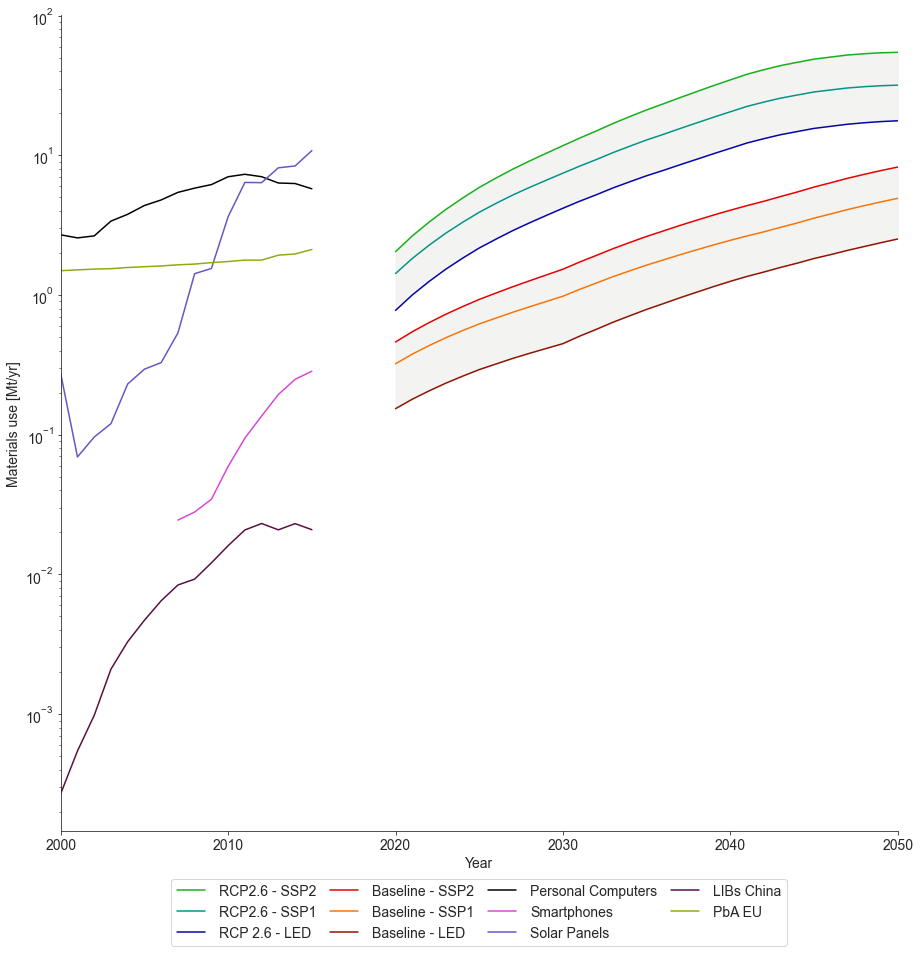

In [199]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    y = materials_addition_all[i]
    x = materials_addition_all[i].index
    ax.plot(x, y, color = linecols[i])#, color = linecols[i], s = 100)


ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers')
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones')
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels')
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China')
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU')
#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line7,line8,line9,line10,line11]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time.jpg', bbox_inches = 'tight', dpi = 600)

chemistries = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Sheet1', skiprows=24, nrows = 8, usecols = 'B:AV')

In [200]:
historical_segments = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows = 71, nrows = 7, usecols = 'Q:V')
historical_sales = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Historical EVs sales', skiprows = 13, nrows = 2, usecols = 'L:Q')
#batt_size_PHEV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows=20, nrows = 7, usecols = 'B:C')
#batt_size_PHEV = batt_size_PHEV.set_index("Segment")

In [201]:
batt_size_PHEV = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'BEV_data', skiprows=20, nrows = 7, usecols = 'C')


In [202]:
BEV_sales_historical = pd.DataFrame(historical_sales.loc[0,:])
PHEV_sales_historical = pd.DataFrame(historical_sales.loc[1,:])

In [203]:
BEV_sales_historical = BEV_sales_historical.transpose()
PHEV_sales_historical = PHEV_sales_historical.transpose()

In [204]:
historical_segments.columns = BEV_sales_historical.columns.values

In [205]:
historical_sales_segmented = [BEV_sales_historical.round(), PHEV_sales_historical.round()]
historical_segments = historical_segments.round(decimals=3)

for i in range(2):
    historical_sales_segmented[i] = pd.concat([historical_sales_segmented[i]]*len(historical_segments.index))
    historical_sales_segmented[i] = historical_sales_segmented[i].set_index(historical_segments.index)
    historical_sales_segmented[i] = historical_sales_segmented[i].mul(historical_segments)
    historical_sales_segmented[i] = historical_sales_segmented[i].round()

In [206]:
chem_cut = chemistries.loc[:,chemistries.columns.isin(range(2015,2021))]
chem_cut = chem_cut.round(decimals = 3)
for i in range(len(historical_sales_segmented)):
    historical_sales_segmented[i] = historical_sales_segmented[i].reindex(ind, level = 0)
    historical_sales_segmented[i] = historical_sales_segmented[i].mul(chem_cut, level = 1)
    historical_sales_segmented[i] = historical_sales_segmented[i].round()

In [207]:
historical_capacity = historical_sales_segmented
materials_loading_historical = rep.loc[:,rep.columns.isin(range(2015,2021))]

In [208]:
batt_size_PHEV = pd.concat([batt_size_PHEV]*(len(historical_segments.columns)), axis = 1)
batt_size_PHEV.columns = [2015,2016,2017,2018,2019,2020]

In [209]:
mean_historical = mean_batt.loc[:, mean_batt.columns.isin(range(2015,2021))]
historical_capacity[0] = historical_sales_segmented[0].mul(mean_historical, level = 0)
historical_capacity[1] = historical_sales_segmented[1].mul(batt_size_PHEV, level = 0)

In [210]:
historical_materials = historical_capacity
for i in range(len(historical_materials)):
    historical_materials[i] = historical_materials[i].reindex(new)
    historical_materials[i] = historical_materials[i].mul(materials_loading_historical, level = 2)


In [211]:
all_materials_historical = historical_materials[0]+historical_materials[1]
capacity_historical = historical_capacity[0]+historical_capacity[1] 

In [212]:
materials_addition_all.append(all_materials_historical.sum(axis = 0).div(1e9))

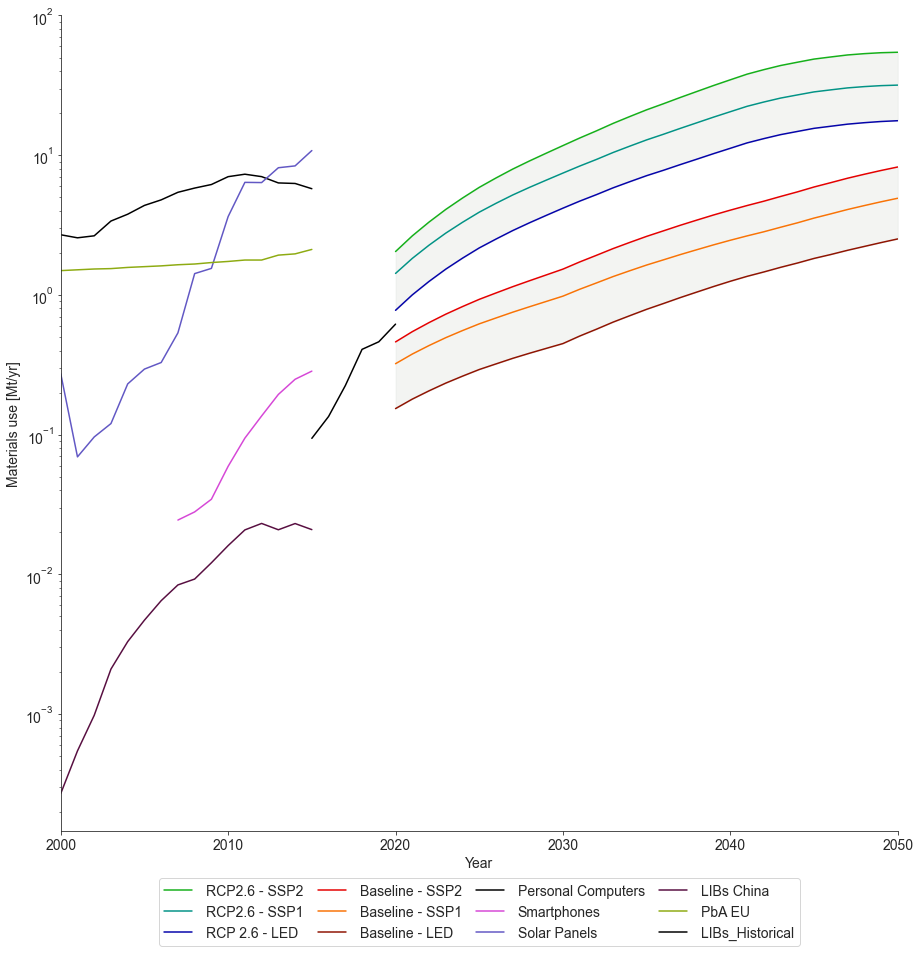

In [213]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    y = materials_addition_all[i]
    x = materials_addition_all[i].index
    ax.plot(x, y, color = linecols[i])#, color = linecols[i], s = 100)


ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers')
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones')
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels')
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China')
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical')
#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line7,line8,line9,line10,line11,line12]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time.jpg', bbox_inches = 'tight', dpi = 600)

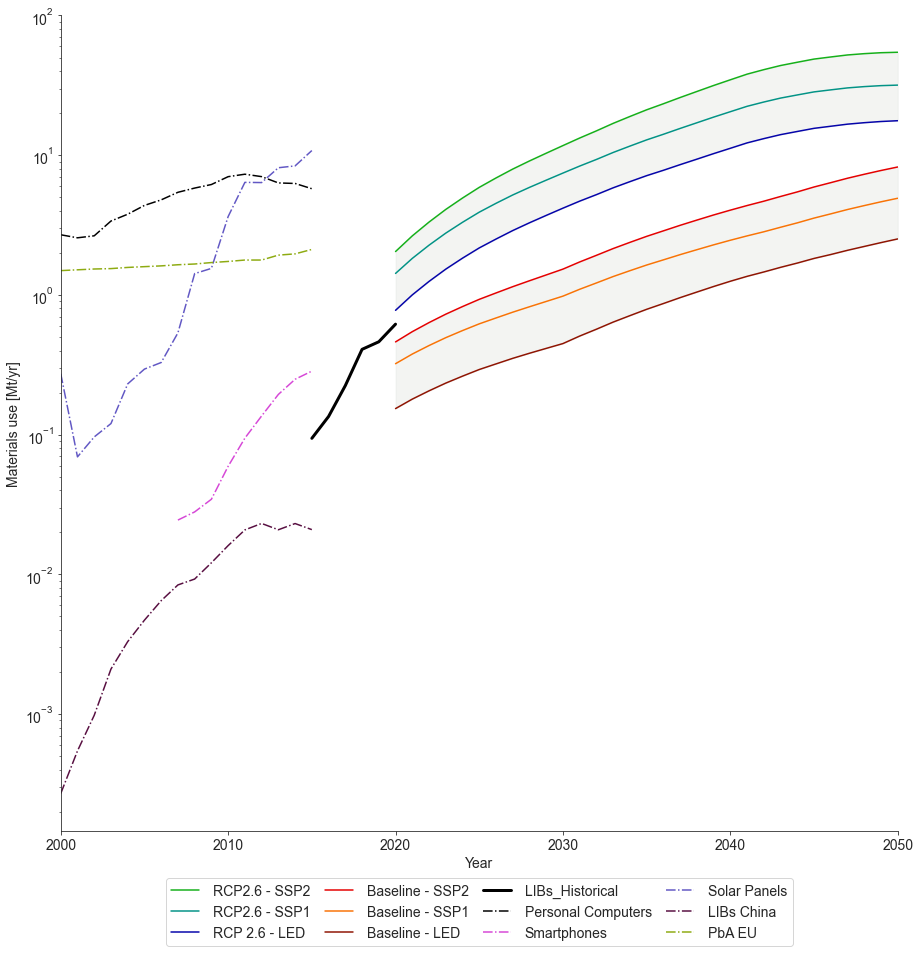

In [214]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    if i <= 5:
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i])
    elif i> 5 and i <= 10: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linestyle=('-.'))
    else: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linewidth = 3)


ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line12,line7,line8,line9,line10,line11]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)

In [215]:
scenarios_2015_2020 = [matadd_RCP26_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_RCP26_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_RCP26_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], 
                          matadd_base_SSP2.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_base_SSP1.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6], matadd_base_LED.divide(1e9).groupby('material').sum().sum(axis = 0)[1:6]]

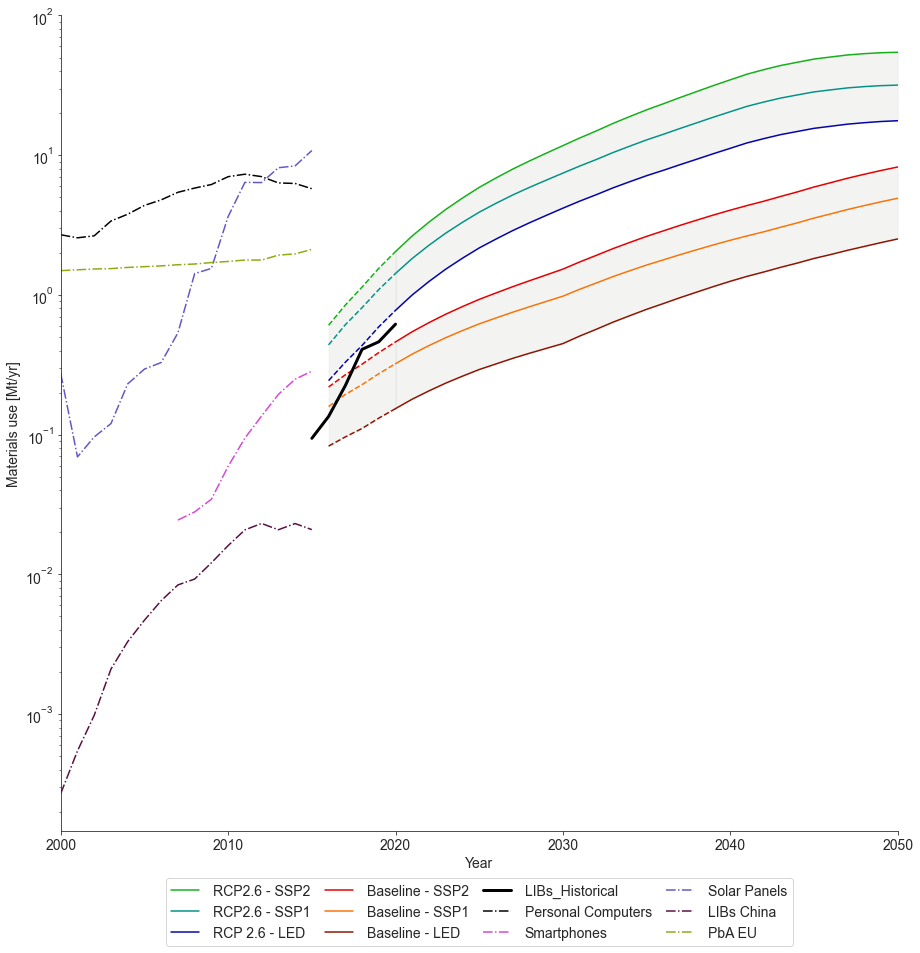

In [216]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    if i <= 5:
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i])
        y = scenarios_2015_2020[i]
        x = scenarios_2015_2020[i].index
        ax.plot(x,y, color = linecols[i], linestyle = ('--'))
    elif i> 5 and i <= 10: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linestyle=('-.'))
    else: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linewidth = 3)

#plt.annotate("I HAVE NO IDEA WHAT I AM DOING?!", xy=(2040,0.001))
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[0], y2 = scenarios_2015_2020[2],color = col_background, alpha = .3)
ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[3], y2 = scenarios_2015_2020[5],color = col_background, alpha = .3)


ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line12,line7,line8,line9,line10,line11]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)

In [217]:
new = []
for df in materials_addition_all:
    new.append(df.pct_change())

In [218]:
def plot_test(materials_addition_all, logy = False):
    linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
    col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


    fig, ax = plt.subplots(figsize = (15,15))
    for i in range(len(new)):
        if i <= 5:
            y = materials_addition_all[i]
            x = materials_addition_all[i].index
            ax.plot(x, y, color = linecols[i])
            y = scenarios_2015_2020[i]
            x = scenarios_2015_2020[i].index
            ax.plot(x,y, color = linecols[i], linestyle = ('--'))
        elif i> 5 and i <= 10: 
            y = materials_addition_all[i]
            x = materials_addition_all[i].index
            ax.plot(x, y, color = linecols[i], linestyle=('-.'))
        else: 
            y = materials_addition_all[i]
            x = materials_addition_all[i].index
            ax.plot(x, y, color = linecols[i], linewidth = 3)

    #plt.annotate("I HAVE NO IDEA WHAT I AM DOING?!", xy=(2040,0.001))
    ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
    ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

    ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[0], y2 = scenarios_2015_2020[2],color = col_background, alpha = .3)
    ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[3], y2 = scenarios_2015_2020[5],color = col_background, alpha = .3)

    if logy is True:
        ax.set_yscale('log')
    ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
    ax.set_xlabel('Year', fontsize = 14)

    ax.set_xlim(2000,2050)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize = 14)
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
    #ax.set_xlim(1e-1,1e2)
    ##### LEGEND #####

    line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
    line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
    line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
    line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
    line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
    line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
    line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
    line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
    line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
    line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
    line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
    line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

    #handles_BEV2 = [baseline_marker]
    lines = [line1,line2,line3,line4, line5,line6,line12,line7,line8,line9,line10,line11]
    #lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

    #plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

    ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
    #plt.savefig('New figures/Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)

In [219]:
cobalt_historical = pd.read_excel('Cobalt_historical.xlsx', sheet_name = 'Cobalt_short', skiprows = 4, nrows = 118, usecols = 'A:B')
lithium_historical = pd.read_excel('Lithium_historical.xlsx', sheet_name = 'Lithium_short', skiprows = 4, nrows = 118, usecols = 'A:B')
graphite_historical = pd.read_excel('Graphite_historical.xlsx', sheet_name = 'Graphite_short', skiprows = 4, nrows = 118, usecols = 'A:B')

#years_index = pd.read_excel('Graphite_historical.xlsx', sheet_name = 'Graphite', skiprows = 4, nrows = 118, usecols = 'A')

In [220]:
cobalt_historical = cobalt_historical.set_index(['Year'])
lithium_historical = lithium_historical.set_index(['Year'])
graphite_historical = graphite_historical.set_index(['Year'])